<center>
<img src="../images/fscampus_small2.png" width="1200"/>
</center>

<center>

# Investments

***Finance 2 - BFIN***

**Dr. Omer Cayirli**

Lecturer in Empirical Finance

omer.cayirli@vgu.edu.vn
</center>

---



## Lecture 05
---

### Outline
* Portfolio Theory and Practice
  
  * Efficient Diversification
  
  * Portfolio Optimization

---



### Opportunity Set of Risky Assets
*   Minimum-variance frontier shows the `risk-return opportunities` available to the investor.
*   Efficient frontier
    *   There is an efficient portfolio for each risk level.
    *   Portfolios on the efficient frontier represent trade-offs in terms of risk and return.

| $E(r_A)$   | 6.00%    | $E(r_B)$   | 10.00%   | Cov($r_A$, $r_B$) | 0.007500 |
| :--------- | :------- | :--------- | :------- | :---------------- | :------- |
| $\sigma_A$ | 10.00%   | $\sigma_B$ | 15.00%   |                   |          |
| $\sigma_A^2$ | 0.010000 | $\sigma_B^2$ | 0.022500 |                   |          |

| $w_A$ | $w_B$ | $E(r_p)$ | $\sigma_p^2$ | $\sigma_p$ |
| :---- | :---- | :------- | :----------- | :--------- |
| 100%  | 0%    | 6.00%    | 0.010000     | 10.00%     |
| 90%   | 10%   | 6.40%    | 0.009825     | 9.91%      |
| 80%   | 20%   | 6.80%    | 0.009900     | 9.95%      |
| 70%   | 30%   | 7.20%    | 0.010225     | 10.11%     |
| 60%   | 40%   | 7.60%    | 0.010800     | 10.39%     |
| 50%   | 50%   | 8.00%    | 0.011625     | 10.78%     |
| 40%   | 60%   | 8.40%    | 0.012700     | 11.27%     |
| 30%   | 70%   | 8.80%    | 0.014025     | 11.84%     |
| 20%   | 80%   | 9.20%    | 0.015600     | 12.49%     |
| 10%   | 90%   | 9.60%    | 0.017425     | 13.20%     |
| 0%    | 100%  | 10.00%   | 0.022500     | 15.00%     |

---



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Input Parameter Widgets ---
style_desc = {'description_width': '200px'}
widget_layout_left = widgets.Layout(width='350px')
widget_layout_right = widgets.Layout(width='350px')

# --- FIX: Default values updated to match the new slide ---
er_a_widget = widgets.FloatText(value=0.060, step=0.0001, description='Expected Return Asset A (E(rA)):', style=style_desc, layout=widget_layout_left)
std_a_widget = widgets.FloatText(value=0.100, step=0.0001, description='Std. Dev. Asset A (σA):', style=style_desc, layout=widget_layout_left)
corr_ab_widget = widgets.FloatText(value=0.50, step=0.0001, min=-1, max=1, description='Correlation (ρAB):', style=style_desc, layout=widget_layout_left)
cov_ab_widget = widgets.FloatText(value=0.0075, step=0.000001, description='Covariance (Cov(rA, rB)):', style=style_desc, layout=widget_layout_left)

er_b_widget = widgets.FloatText(value=0.100, step=0.0001, description='Expected Return Asset B (E(rB)):', style=style_desc, layout=widget_layout_right)
std_b_widget = widgets.FloatText(value=0.150, step=0.0001, description='Std. Dev. Asset B (σB):', style=style_desc, layout=widget_layout_right)
# --- End of FIX ---

# --- Output Widgets ---
output_gmvp = widgets.Output()
output_table = widgets.Output()
output_plot = widgets.Output()

# --- Recalculate Button ---
recalculate_button = widgets.Button(
    description="Recalculate & Plot",
    button_style='info',
    tooltip='Click to update frontiers and table',
    icon='refresh',
    layout=widgets.Layout(width='auto', min_width='150px', margin='10px 0 0 0')
)

# --- Linking Logic for Correlation and Covariance ---
updating_internally = False

def format_float_widget_value(widget, value, precision):
    try:
        if pd.isna(value):
            actual_value_to_set = 0.0
        else:
            actual_value_to_set = float(f"{value:.{precision}f}")
        current_widget_val = widget.value
        if current_widget_val is None or abs(current_widget_val - actual_value_to_set) > 10**-(precision+1):
            widget.value = actual_value_to_set
    except Exception:
        pass

def update_covariance(change):
    global updating_internally
    if updating_internally: return
    updating_internally = True
    try:
        std_a = std_a_widget.value; std_b = std_b_widget.value; corr_ab = corr_ab_widget.value
        if std_a is not None and std_b is not None and corr_ab is not None and std_a >= 0 and std_b >= 0:
            new_cov = corr_ab * std_a * std_b
            format_float_widget_value(cov_ab_widget, new_cov, 6)
    except Exception: pass
    finally: updating_internally = False

def update_correlation(change):
    global updating_internally
    if updating_internally: return
    updating_internally = True
    try:
        std_a = std_a_widget.value; std_b = std_b_widget.value; cov_ab = cov_ab_widget.value
        if std_a is not None and std_b is not None and cov_ab is not None:
            if std_a > 1e-9 and std_b > 1e-9:
                corr_val = cov_ab / (std_a * std_b)
                format_float_widget_value(corr_ab_widget, np.clip(corr_val, -1, 1), 4)
            elif abs(std_a) < 1e-9 or abs(std_b) < 1e-9:
                 format_float_widget_value(corr_ab_widget, 0.0 if abs(cov_ab) < 1e-9 else np.nan, 4)
            else:
                 format_float_widget_value(corr_ab_widget, np.nan, 4)
    except Exception: pass
    finally: updating_internally = False

def on_std_dev_change(change):
    update_covariance(None)

corr_ab_widget.observe(update_covariance, names='value')
cov_ab_widget.observe(update_correlation, names='value')
std_a_widget.observe(on_std_dev_change, names='value')
std_b_widget.observe(on_std_dev_change, names='value')

# --- Core Calculation and Plotting Logic ---
def calculate_and_display_frontiers(b=None):
    with output_gmvp: clear_output(wait=True)
    with output_table: clear_output(wait=True)
    with output_plot: clear_output(wait=True)
    try:
        er_a = er_a_widget.value; std_a = std_a_widget.value; var_a = std_a**2
        er_b = er_b_widget.value; std_b = std_b_widget.value; var_b = std_b**2
        cov_ab = cov_ab_widget.value

        if any(v is None for v in [er_a, std_a, er_b, std_b, cov_ab]):
             with output_plot: print("Error: One or more input values are missing or invalid.")
             return

        plot_weights_a = np.linspace(0, 1, 100)
        plot_portfolio_returns = np.array([w_a * er_a + (1 - w_a) * er_b for w_a in plot_weights_a])
        plot_portfolio_variances = np.array([(w_a**2 * var_a) + ((1 - w_a)**2 * var_b) + (2 * w_a * (1 - w_a) * cov_ab) for w_a in plot_weights_a])
        plot_portfolio_variances = np.maximum(0, plot_portfolio_variances)
        plot_portfolio_std_devs = np.sqrt(plot_portfolio_variances)

        denominator_gmvp = var_a + var_b - 2 * cov_ab
        w_a_gmvp = 0.5 if abs(denominator_gmvp) < 1e-9 else (var_b - cov_ab) / denominator_gmvp
        w_a_gmvp = np.clip(w_a_gmvp, 0, 1); w_b_gmvp = 1 - w_a_gmvp
        gmvp_return = w_a_gmvp * er_a + w_b_gmvp * er_b
        gmvp_variance = (w_a_gmvp**2 * var_a) + (w_b_gmvp**2 * var_b) + (2 * w_a_gmvp * w_b_gmvp * cov_ab)
        gmvp_variance = max(0, gmvp_variance)
        gmvp_std_dev = np.sqrt(gmvp_variance)

        with output_gmvp:
            display(widgets.HTML("<h4>Global Minimum Variance Portfolio (GMVP):</h4>"))
            gmvp_df = pd.DataFrame({
                'Weight Asset A (wA)': [f"{w_a_gmvp*100:.2f}%"], 'Weight Asset B (wB)': [f"{w_b_gmvp*100:.2f}%"],
                'Expected Return E(Rp)': [f"{gmvp_return*100:.3f}%"], 'Variance (σp²)': [f"{gmvp_variance:.6f}"],
                'Std. Deviation (σp)': [f"{gmvp_std_dev*100:.2f}%"]})
            display(gmvp_df)

        table_weights_a = np.array([1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0])
        table_data = []
        for w_a_t in table_weights_a:
            w_b_t = 1 - w_a_t
            rp_t = w_a_t * er_a + w_b_t * er_b
            var_p_t = (w_a_t**2 * var_a) + (w_b_t**2 * var_b) + (2 * w_a_t * w_b_t * cov_ab)
            var_p_t = max(0, var_p_t)
            std_p_t = np.sqrt(var_p_t)
            table_data.append([f"{w_a_t*100:.0f}%", f"{w_b_t*100:.0f}%", f"{rp_t*100:.3f}%", f"{var_p_t:.6f}", f"{std_p_t*100:.2f}%"])
        df_table = pd.DataFrame(table_data, columns=["wA", "wB", "E(rp)", "σp²", "σp"])
        with output_table:
            display(widgets.HTML("<h4>Portfolio Combinations Table:</h4>"))
            display(df_table)

        with output_plot:
            fig, ax = plt.subplots(figsize=(9, 6))
            ax.plot(plot_portfolio_std_devs, plot_portfolio_returns, linestyle='-', color='blue', label='Minimum Variance Frontier')
            
            sort_indices = np.argsort(plot_portfolio_std_devs)
            sorted_stds = plot_portfolio_std_devs[sort_indices]; sorted_rets = plot_portfolio_returns[sort_indices]
            gmvp_sorted_idx = np.argmin(sorted_stds)
            
            eff_stds = sorted_stds[gmvp_sorted_idx:]; eff_rets = sorted_rets[gmvp_sorted_idx:]
            
            final_eff_stds = [eff_stds[0]] if len(eff_stds)>0 else []; final_eff_rets = [eff_rets[0]] if len(eff_rets)>0 else []
            if len(eff_stds) > 0:
                for k in range(1, len(eff_stds)):
                    if eff_rets[k] >= final_eff_rets[-1] - 1e-6:
                        final_eff_stds.append(eff_stds[k]); final_eff_rets.append(eff_rets[k])
            
            if final_eff_stds:
                 ax.plot(final_eff_stds, final_eff_rets, linestyle='-', color='green', linewidth=2.5, label='Efficient Frontier', zorder=3)

            ax.scatter([std_a], [er_a], color='red', marker='o', s=100, label='Asset A', zorder=4)
            ax.scatter([std_b], [er_b], color='purple', marker='o', s=100, label='Asset B', zorder=4)
            ax.scatter([gmvp_std_dev], [gmvp_return], color='black', marker='*', s=200, label='GMVP', zorder=5)
            ax.set_title('Portfolio Risk: Minimum Variance & Efficient Frontier'); ax.set_xlabel('Portfolio Std Dev (σp)'); ax.set_ylabel('Portfolio Exp Return (E(rp))')
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.2f}%')); ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.2f}%'))
            ax.legend(); ax.grid(True, linestyle='--', alpha=0.7); plt.tight_layout(); plt.show()
    except Exception as e:
        with output_gmvp: clear_output(wait=True); print(f"Error in GMVP: {e}")
        with output_table: clear_output(wait=True); print(f"Error in Table: {e}")
        with output_plot: clear_output(wait=True); print(f"Error in Plot: {e}")

# --- Linking Button and Initial Display ---
recalculate_button.on_click(calculate_and_display_frontiers)

title_widget = widgets.HTML("<h2>Portfolio Risk Calculation (Two Assets)</h2>", layout=widgets.Layout(width='100%'))
formula_cov_widget = widgets.HTML("For a two-asset portfolio (using Covariance):<br>    σ²(rp) = w₁²σ²(r₁) + w₂²σ²(r₂) + 2w₁w₂Cov(r₁, r₂)", layout=widgets.Layout(margin='0 0 2px 0'))
formula_corr_widget = widgets.HTML("For a two-asset portfolio (using Correlation):<br>    σ²(rp) = w₁²σ²(r₁) + w₂²σ²(r₂) + 2w₁w₂ρ₁₂σ₁σ₂", layout=widgets.Layout(margin='0 0 15px 0'))
inputs_col_a_corr_cov = widgets.VBox([er_a_widget, std_a_widget, corr_ab_widget, cov_ab_widget])
inputs_col_b = widgets.VBox([er_b_widget, std_b_widget], layout=widgets.Layout(margin='0 0 0 20px'))
left_panel_with_button = widgets.VBox([inputs_col_a_corr_cov, recalculate_button])
input_ui_grid = widgets.HBox([left_panel_with_button, inputs_col_b])

full_ui = widgets.VBox([
    title_widget, formula_cov_widget, formula_corr_widget, input_ui_grid,
    output_gmvp, widgets.HTML("<hr>"), output_table, widgets.HTML("<hr>"), output_plot
])

on_std_dev_change(None)
display(full_ui)
calculate_and_display_frontiers()

,Global MV Portfolios No Short,Global MV Portfolios With Short
AMD,0.00%,-4.34%
AMZN,6.70%,11.75%
F,0.00%,-3.46%
JPM,10.01%,8.64%
NVDA,0.00%,-0.21%
PFE,34.41%,36.91%
TGT,17.75%,19.84%
XOM,31.14%,30.85%
E(Rp),0.82%,0.81%
σp,4.39%,4.29%



---


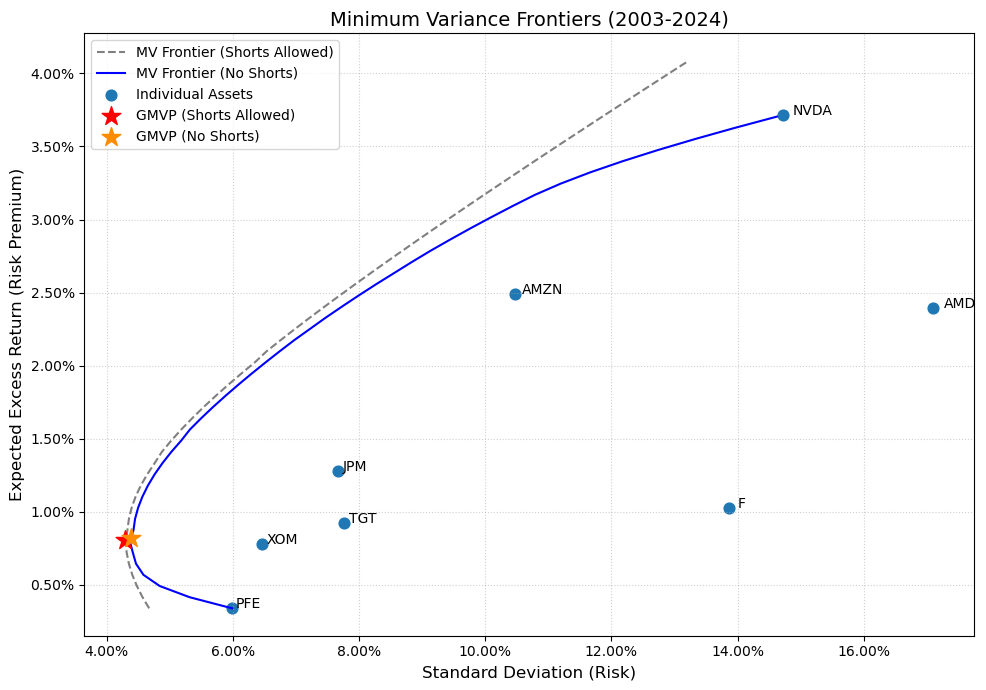

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from scipy.optimize import minimize
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import datetime
import warnings

# --- 1. Data Download and Preparation ---
tickers = ['AMD', 'AMZN', 'F', 'JPM', 'NVDA', 'PFE', 'TGT', 'XOM']
start_date = datetime.date(2002, 12, 1)
end_date = datetime.date(2024, 12, 31)

print(f"Downloading data for specified tickers from {start_date} to {end_date}...")

try:
    data_downloaded = yf.download(
        tickers, start=start_date, end=end_date, interval='1mo',
        group_by='ticker', progress=False, auto_adjust=True, actions=False
    )
    if data_downloaded.empty: raise ValueError("yf.download returned an empty DataFrame.")
    
    df_list = [data_downloaded[t]['Close'].rename(t) for t in tickers if t in data_downloaded.columns.get_level_values(0)]
    adj_close_df = pd.concat(df_list, axis=1)
    monthly_returns_raw = adj_close_df.pct_change()

    # --- FIX 1: Use a time-series risk-free rate to calculate excess returns ---
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", FutureWarning)
        ff_factors = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start=start_date, end=end_date)[0]
    
    ff_factors.index = ff_factors.index.to_timestamp(how='start')
    rf_series = (ff_factors['RF'] / 100)
    
    monthly_excess_returns = monthly_returns_raw.sub(rf_series, axis=0)
    
    sample_start, sample_end = '2003-01-01', '2024-12-31'
    monthly_excess_returns = monthly_excess_returns.loc[sample_start:sample_end].dropna(how='all')

except Exception as e:
    print(f"Data Acquisition Error: {e}")
    monthly_excess_returns = pd.DataFrame()

# --- 2. Portfolio Optimization ---
if not monthly_excess_returns.empty:
    mean_excess_returns = monthly_excess_returns.mean()
    cov_matrix = monthly_excess_returns.cov()
    num_assets = len(tickers)
    rf_rate_avg = rf_series.loc[sample_start:sample_end].mean() # For Sharpe calc context

    # GMVP (With Shorts)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    ones = np.ones(num_assets)
    w_short = inv_cov_matrix.dot(ones) / (ones.T.dot(inv_cov_matrix).dot(ones))
    er_short = w_short.T.dot(mean_excess_returns)
    std_short = np.sqrt(w_short.T.dot(cov_matrix).dot(w_short))
    sharpe_short = er_short / std_short

    # GMVP (No Shorts)
    def portfolio_variance(weights, cov): return weights.T.dot(cov).dot(weights)
    constraints_no_short = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds_no_short = tuple((0, 1) for _ in range(num_assets))
    initial_guess = num_assets * [1. / num_assets]
    result_no_short = minimize(portfolio_variance, initial_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds_no_short, constraints=constraints_no_short)
    w_no_short = result_no_short.x
    er_no_short = w_no_short.T.dot(mean_excess_returns)
    std_no_short = np.sqrt(result_no_short.fun)
    sharpe_no_short = er_no_short / std_no_short
    
    # Frontier Calculation
    target_returns = np.linspace(min(mean_excess_returns), max(mean_excess_returns)*1.1, 50)
    def solve_frontier(target_ret, allow_short):
        constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}, {'type': 'eq', 'fun': lambda w: w.T.dot(mean_excess_returns) - target_ret}]
        bounds = None if allow_short else bounds_no_short
        result = minimize(portfolio_variance, initial_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
        return np.sqrt(result.fun) if result.success else np.nan
    frontier_std_short = [solve_frontier(tr, True) for tr in target_returns]
    frontier_std_no_short = [solve_frontier(tr, False) for tr in target_returns]

    # --- 3. Assemble and Display ---
    results_df = pd.DataFrame({'Global MV Portfolios No Short': w_no_short, 'Global MV Portfolios With Short': w_short}, index=tickers)
    summary_data = {'Global MV Portfolios No Short': [er_no_short, std_no_short, rf_rate_avg, sharpe_no_short], 'Global MV Portfolios With Short': [er_short, std_short, rf_rate_avg, sharpe_short]}
    summary_df = pd.DataFrame(summary_data, index=['E(Rp)', 'σp', 'rf', 'Sharpe Ratio'])
    final_table = pd.concat([results_df, summary_df])

    display(HTML("<h3>Opportunity Set of Risky Assets</h3>"))
    display(final_table.style.format('{:.2%}').format(subset=pd.IndexSlice[['Sharpe Ratio'], :], formatter="{:.4f}"))
    print("\n---")
    
    # --- 4. Generate the Plot ---
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(frontier_std_short, target_returns, linestyle='--', color='gray', label='MV Frontier (Shorts Allowed)')
    ax.plot(frontier_std_no_short, target_returns, linestyle='-', color='blue', label='MV Frontier (No Shorts)')
    asset_risk = np.sqrt(np.diag(cov_matrix))
    ax.scatter(asset_risk, mean_excess_returns, marker='o', s=60, label='Individual Assets')
    
    # --- FIX 2: Access Series by label (txt) ---
    for txt in tickers:
        ax.annotate(txt, (cov_matrix.loc[txt,txt]**0.5 * 1.01, mean_excess_returns[txt]))

    ax.scatter(std_short, er_short, marker='*', color='red', s=200, zorder=5, label='GMVP (Shorts Allowed)')
    ax.scatter(std_no_short, er_no_short, marker='*', color='darkorange', s=200, zorder=5, label='GMVP (No Shorts)')
    
    ax.set_title(f'Minimum Variance Frontiers ({sample_start[:4]}-{sample_end[:4]})', fontsize=14)
    ax.set_xlabel('Standard Deviation (Risk)', fontsize=12)
    ax.set_ylabel('Expected Excess Return (Risk Premium)', fontsize=12)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2%}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2%}'))
    ax.legend(); ax.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout(); plt.show()
else:
    print("Could not generate output because no valid data was downloaded.")

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from scipy.optimize import minimize
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime
import warnings

# --- 1. Core Analysis Function (FIXED to optimize for Sharpe Ratio) ---
def analyze_period(returns_df, rf_rate_series, tickers):
    if returns_df.empty or len(returns_df) < 12: return None
    
    rf_at_end_of_period = rf_rate_series.reindex(returns_df.index).iloc[-1] if not rf_rate_series.reindex(returns_df.index).empty else 0.0
    if pd.isna(rf_at_end_of_period): rf_at_end_of_period = 0.0

    mean_returns = returns_df.mean()
    cov_matrix = returns_df.cov()
    num_assets = len(tickers)
    initial_guess = num_assets * [1. / num_assets]
    
    def neg_sharpe_ratio(weights, mean_returns, cov_matrix, rf_rate):
        er = weights.T @ mean_returns
        std = np.sqrt(weights.T @ cov_matrix @ weights)
        return -(er - rf_rate) / std if std > 1e-9 else 1e9

    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    
    res_short = minimize(neg_sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix, rf_at_end_of_period), method='SLSQP', constraints=constraints)
    w_s = res_short.x
    er_s = w_s.T @ mean_returns
    std_s = np.sqrt(w_s.T @ cov_matrix @ w_s)
    sharpe_s = (er_s - rf_at_end_of_period) / std_s

    bounds_no_short = tuple((0, 1) for _ in range(num_assets))
    res_no_short = minimize(neg_sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix, rf_at_end_of_period), method='SLSQP', bounds=bounds_no_short, constraints=constraints)
    w_ns = res_no_short.x
    er_ns = w_ns.T @ mean_returns
    std_ns = np.sqrt(w_ns.T @ cov_matrix @ w_ns)
    sharpe_ns = (er_ns - rf_at_end_of_period) / std_ns
    
    def portfolio_variance(w, cov): return w.T @ cov @ w
    target_returns = np.linspace(min(mean_returns.min(), er_ns, er_s), mean_returns.max() * 1.1, 50)
    def solve_frontier(target_ret, allow_short):
        cons = [{'type': 'eq', 'fun': lambda w: np.sum(w)-1}, {'type': 'eq', 'fun': lambda w: w.T @ mean_returns - target_ret}]
        bds = None if allow_short else bounds_no_short
        res_fr = minimize(portfolio_variance, initial_guess, args=(cov_matrix,), method='SLSQP', bounds=bds, constraints=cons)
        return np.sqrt(res_fr.fun) if res_fr.success else np.nan
        
    fr_s = [solve_frontier(tr, True) for tr in target_returns]
    fr_ns = [solve_frontier(tr, False) for tr in target_returns]
    
    return {'w_s': w_s, 'er_s': er_s, 'std_s': std_s, 'sharpe_s': sharpe_s,
            'w_ns': w_ns, 'er_ns': er_ns, 'std_ns': std_ns, 'sharpe_ns': sharpe_ns,
            'fr_s': fr_s, 'fr_ns': fr_ns, 'target_r': target_returns, 
            'mean_r': mean_returns, 'cov': cov_matrix, 'rf': rf_at_end_of_period, 'tickers': tickers}

# --- 2. UI and Main Handler ---
tickers = ['AMD', 'AMZN', 'F', 'JPM', 'NVDA', 'PFE', 'TGT', 'XOM']
start_date_widget = widgets.DatePicker(description='Sample Start:', value=datetime.date(2003, 1, 1))
split_date_widget = widgets.DatePicker(description='Sample Split:', value=datetime.date(2013, 1, 1))
end_date_widget = widgets.DatePicker(description='Sample End:', value=datetime.date(2024, 12, 31))
run_button = widgets.Button(description="Run Sub-Sample Analysis", button_style='success', icon='play')
output_tables, output_plots = widgets.Output(), widgets.Output()

def run_full_analysis(b=None):
    # --- FIX: Separate the 'with' statements ---
    with output_tables:
        clear_output(wait=True)
    with output_plots:
        clear_output(wait=True)
    
    start, split, end = start_date_widget.value, split_date_widget.value, end_date_widget.value
    if not (start < split < end):
        with output_tables: display(HTML("<p style='color:red;'>Error: Dates must be in order.</p>")); return
    sub1_start, sub1_end = start, split - datetime.timedelta(days=1); sub2_start, sub2_end = split, end
    with output_tables: print(f"Downloading data from {start} to {end}...")
    try:
        data = yf.download(tickers, start=start, end=end, interval='1mo', group_by='ticker', progress=False, auto_adjust=True, actions=False)
        returns = pd.concat([data[t]['Close'].rename(t) for t in tickers if t in data.columns.get_level_values(0)], axis=1).pct_change().dropna(how='all')
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", FutureWarning)
            ff = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start=start, end=end)[0]
        returns.index = returns.index.to_period('M').to_timestamp(); ff.index = ff.index.to_timestamp(how='start')
        rf_series = ff['RF'] / 100
    except Exception as e:
        with output_tables: clear_output(wait=True); display(HTML(f"<p style='color:red;'>Data Error: {e}</p>")); return
    sub1_returns, sub2_returns = returns.loc[sub1_start:sub1_end], returns.loc[sub2_start:sub2_end]
    results1, results2 = analyze_period(sub1_returns, rf_series, tickers), analyze_period(sub2_returns, rf_series, tickers)
    with output_tables:
        clear_output(wait=True)
        html_tables = ""
        for i, r in enumerate([results1, results2]):
            if r is None: html_tables += f"<div style='flex:1;'><p style='color:orange;'>Insufficient data for Sub-sample {i+1}.</p></div>"; continue
            res_df = pd.DataFrame({'No Short': r['w_ns'], 'With Short': r['w_s']}, index=r['tickers'])
            summary = pd.DataFrame({'No Short': [r['er_ns'], r['std_ns'], r['rf'], r['sharpe_ns']], 'With Short': [r['er_s'], r['std_s'], r['rf'], r['sharpe_s']]}, index=['E(rp)', 'σp', 'rf', 'Sharpe Ratio'])
            final_df = pd.concat([res_df, summary])
            styler = final_df.style.format('{:.2%}').format(subset=pd.IndexSlice[['Sharpe Ratio'], :], formatter="{:.4f}")
            html_tables += f"<div style='flex:1; padding:0 10px;'>{styler.to_html()}</div>"
        display(HTML(f"<h3>Optimal Risky Portfolios</h3><div style='display:flex;'>{html_tables}</div><hr>"))
    with output_plots:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        max_x, max_y, min_y = 0, -np.inf, np.inf
        for r in [results1, results2]:
            if r is not None:
                asset_risks = np.sqrt(np.diag(r['cov'])); max_x = max(max_x, np.nanmax(asset_risks)*1.1); max_y = max(max_y, r['mean_r'].max()*1.1); min_y = min(min_y, r['mean_r'].min())
        for i, (ax, r, start_dt, end_dt) in enumerate(zip([ax1, ax2], [results1, results2], [sub1_start, sub2_start], [sub1_end, sub2_end])):
            title = f"Sub-sample {i+1} ({start_dt.year}-{end_dt.year})"
            if r is None: ax.text(0.5, 0.5, 'Insufficient Data', ha='center'); ax.set_title(title); continue
            ax.plot(r['fr_s'], r['target_r'], linestyle='--', c='gray', label='MVF (Shorts)'); ax.plot(r['fr_ns'], r['target_r'], linestyle='-', c='blue', label='MVF (No Shorts)')
            asset_risk = np.sqrt(np.diag(r['cov']))
            ax.scatter(asset_risk, r['mean_r'], marker='o', s=60, label='Assets')
            ax.scatter(r['std_s'], r['er_s'], marker='*', c='red', s=200, zorder=5, label='Optimal (Shorts)'); ax.scatter(r['std_ns'], r['er_ns'], marker='*', c='orange', s=200, zorder=5, label='Optimal (No Shorts)')
            for txt in r['tickers']: ax.annotate(txt, (r['cov'].loc[txt,txt]**0.5 * 1.02, r['mean_r'][txt]))
            ax.set_title(title, fontsize=14); ax.set_xlabel('Standard Deviation (Risk)'); ax.set_ylabel('Expected Return')
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2%}')); ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2%}'))
            ax.legend(); ax.grid(True, linestyle=':', alpha=0.6)
            ax.set_xlim(left=0, right=max_x); ax.set_ylim(bottom=min_y, top=max_y)
        plt.tight_layout(); plt.show()

run_button.on_click(run_full_analysis)
ui_controls = widgets.VBox([widgets.HBox([start_date_widget, split_date_widget, end_date_widget]), run_button], layout=widgets.Layout(align_items='center'))
full_ui = widgets.VBox([ui_controls, output_tables, output_plots])
display(full_ui)
run_full_analysis(None)

---

### Capital Allocation to Risk-free and Risky Assets
* Complete portfolio consists of the risky asset and the risk-free asset.
  
  * A portfolio risk closer to the desired level can be achieved by changing the weights of risk-free asset and risky assets in the complete portfolio.

$W_{rf} + W_{risky} = 1$

$W_{rf} = 1 - W_{risky}$

$E(r_p) = (1 - W_{risky}) \cdot r_f + W_{risky} \cdot E(r_{risky})$

$E(r_p) = r_f + W_{risky} \cdot [E(r_{risky}) - r_f]$

$\sigma^2(r_p) = w_{rf}^2 \cdot \sigma^2(r_f) + W_{risky}^2 \cdot \sigma^2(r_{risky}) + 2 \cdot W_{rf}W_{risky}Cov(r_f, r_{risky})$

Since $\sigma^2(r_f) = 0$ and $Cov(r_f, r_{risky}) = 0$,

$\sigma^2(r_p) = W_{risky}^2 \cdot \sigma^2(r_{risky})$

---



### Capital Allocation to Risk-free and Risky Assets
If $\sigma^2(r_p) = w_{risky}^2 \cdot \sigma^2(r_{risky})$ then $\sigma(r_p) = W_{risky} \cdot \sigma(r_{risky})$

Thus, $W_{risky} = \frac{\sigma(r_p)}{\sigma(r_{risky})}$

$E(r_p) = r_f + W_{risky} \cdot [E(r_{risky}) - r_f]$

$E(r_p) = r_f + \frac{\sigma(r_p)}{\sigma(r_{risky})} \cdot [E(r_{risky}) - r_f]$

$E(r_p) = r_f + \left[ \frac{E(r_{risky})-r_f}{\sigma(r_{risky})} \right] \cdot \sigma(r_p)$




---



### Capital Allocation to Risk-free and Risky Assets
* Suppose the risk-free interest rate is 5%, the expected return and the standard deviation of the risky portfolio are 12% and 15%, respectively. Then;

$E(r_p) = r_f + \left[ \frac{E(r_{risky}) - r_f}{\sigma(r_{risky})} \right] \cdot \sigma(r_p)$

$E(r_p) = 0.05 + \left[ \frac{0.12-0.05}{0.15} \right] \cdot \sigma(r_p)$

$E(r_p) = 0.05 + 0.4667 \cdot \sigma(r_p)$

<img src = "..\\Pictures\\slide_5\\pic_3.png">

---



In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from scipy.optimize import minimize
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime
import warnings

# --- 1. Core Analysis Function ---
def analyze_period(returns_df, rf_rate):
    """
    Analyze portfolio using only assets present in returns_df.
    No hidden fallbacks - raises on any failure.
    """
    returns_df = returns_df.dropna()  # Common intersection - no partial NaNs
    
    if returns_df.empty or len(returns_df) < 12:
        raise ValueError("Insufficient data: need at least 12 complete monthly returns")
    
    assets = returns_df.columns.tolist()
    mean_returns = returns_df.mean()
    cov_matrix = returns_df.cov()
    
    # FIX: Use arrays consistently
    mu = mean_returns.values
    Sigma = cov_matrix.values
    
    # FIX: Check singular once and reuse
    inv_cov = np.linalg.inv(Sigma)
    
    initial_guess = np.full(len(assets), 1.0 / len(assets))
    
    def port_var(w):
        return float(w @ Sigma @ w)
    
    def neg_sharpe_ratio(w, mean_ret, cov, rf):
        er = float(w @ mean_ret)
        var = float(w @ cov @ w)
        std = np.sqrt(var)
        # FIX: Barrier instead of raising (SLSQP calls on infeasible points)
        if std <= 1e-12:
            return 1e12
        return -(er - rf) / std

    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds_no_short = tuple((0, 1) for _ in range(len(assets)))
    
    # --- GMVP (No Short) ---
    res_gmvp_ns = minimize(
        port_var, initial_guess,
        method='SLSQP', bounds=bounds_no_short, constraints=constraints
    )
    if not res_gmvp_ns.success:
        raise RuntimeError(f"GMVP (No Short) optimization failed: {res_gmvp_ns.message}")
    w_gmvp_ns = res_gmvp_ns.x
    
    # --- GMVP (Short) - Analytical using inv_cov we already computed ---
    ones = np.ones(len(assets))
    w_gmvp_s = inv_cov @ ones / (ones @ inv_cov @ ones)
    if not np.isclose(w_gmvp_s.sum(), 1.0, atol=1e-6):
        raise ValueError(f"GMVP (Short) weights sum to {w_gmvp_s.sum()}, not 1.0")

    # --- Optimal Portfolios ---
    res_opt_ns = minimize(
        neg_sharpe_ratio, initial_guess,
        args=(mu, Sigma, rf_rate),
        method='SLSQP', bounds=bounds_no_short, constraints=constraints
    )
    if not res_opt_ns.success:
        raise RuntimeError(f"Optimal (No Short) optimization failed: {res_opt_ns.message}")
    w_opt_ns = res_opt_ns.x
    
    # Optimal Sharpe (Short) - fully unconstrained except sum=1
    res_opt_s = minimize(
        neg_sharpe_ratio, initial_guess,
        args=(mu, Sigma, rf_rate),
        method='SLSQP', constraints=constraints
    )
    if not res_opt_s.success:
        raise RuntimeError(f"Optimal (Short) optimization failed: {res_opt_s.message}")
    w_opt_s = res_opt_s.x
    
    def stats_of(w):
        er = float(w @ mu)
        sd = float(np.sqrt(w @ Sigma @ w))
        if sd <= 1e-12:
            raise ValueError("Degenerate portfolio (std≈0).")
        return {'w': w, 'er': er, 'std': sd, 'sharpe': (er - rf_rate) / sd}
    
    stats = {
        'gmvp_ns': stats_of(w_gmvp_ns),
        'gmvp_s': stats_of(w_gmvp_s),
        'opt_ns': stats_of(w_opt_ns),
        'opt_s': stats_of(w_opt_s),
    }
    
    lo = min(mean_returns.min(), stats['gmvp_ns']['er'])
    hi = max(mean_returns.max(), stats['opt_ns']['er'], stats['opt_s']['er'])
    target_returns_range = np.linspace(lo, hi, 50)
    
    def solve_frontier(target_ret, allow_short):
        cons = [
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
            {'type': 'eq', 'fun': lambda w, trg=target_ret: float(w @ mu) - trg},
        ]
        bnds = None if allow_short else bounds_no_short
        res = minimize(port_var, initial_guess, method='SLSQP', bounds=bnds, constraints=cons)
        return float(np.sqrt(res.fun)) if res.success else np.nan
    
    stats['frontier_s'] = [solve_frontier(tr, True) for tr in target_returns_range]
    stats['frontier_ns'] = [solve_frontier(tr, False) for tr in target_returns_range]
    
    return {
        'stats': stats,
        'mean_returns': mean_returns,
        'cov_matrix': cov_matrix,
        'rf_rate': rf_rate,
        'assets': assets,
        'target_returns': target_returns_range
    }

# --- 2. UI and Main Handler ---
tickers = ['AMD', 'AMZN', 'F', 'JPM', 'NVDA', 'PFE', 'TGT', 'XOM']
start_date_widget = widgets.DatePicker(
    description='Start Date:',
    value=datetime.date(2003, 1, 1)
)
end_date_widget = widgets.DatePicker(
    description='End Date:',
    value=datetime.date(2024, 12, 31)
)
run_button = widgets.Button(
    description="Run Analysis",
    button_style='success',
    icon='play'
)
output_table = widgets.Output()
output_plot = widgets.Output()

def run_full_analysis(b):
    with output_table:
        clear_output(wait=True)
    with output_plot:
        clear_output(wait=True)
    
    start, end = start_date_widget.value, end_date_widget.value
    
    if not start < end:
        with output_table:
            display(HTML(
                "<p style='color:red;'>Error: Start date must be before end date.</p>"
            ))
        return
    
    with output_table:
        print(f"Downloading data from {start} to {end}...")
    
    try:
        data = yf.download(
            tickers, start=start, end=end, interval='1mo',
            group_by='ticker', progress=False, auto_adjust=True, actions=False
        )
        
        # Build list of available tickers
        df_list = [
            data[t]['Close'].rename(t) for t in tickers
            if t in data.columns.get_level_values(0)
        ]
        
        if not df_list:
            raise ValueError("No data downloaded for any ticker")
        
        monthly_returns = pd.concat(df_list, axis=1).pct_change()
        
        # FIX: Drop columns with too few non-NaN returns before analyze_period
        monthly_returns = monthly_returns.loc[:, monthly_returns.notna().sum() >= 12]
        if monthly_returns.shape[1] < 2:
            raise ValueError("Fewer than 2 assets with >=12 monthly returns.")
        
    except Exception as e:
        with output_table:
            clear_output(wait=True)
            display(HTML(f"<p style='color:red;'>Data Error: {e}</p>"))
        return
    
    # FIX: Use end-of-period risk-free rate
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", FutureWarning)
            ff = web.DataReader(
                'F-F_Research_Data_Factors', 'famafrench',
                start=start, end=end
            )[0]
        rf_rate = (ff['RF'] / 100).iloc[-1]
    except Exception as e:
        with output_table:
            print(f"Warning: Could not fetch Fama-French data ({e}). Using rf=0%")
        rf_rate = 0.0
    
    try:
        results = analyze_period(monthly_returns, rf_rate)
    except Exception as e:
        with output_table:
            clear_output(wait=True)
            display(HTML(f"<p style='color:red;'>Analysis Error: {e}</p>"))
        return

    with output_table:
        clear_output(wait=True)
        r = results['stats']
        assets = results['assets']
        
        port_cols = {
            'Global MV (No Short)': r['gmvp_ns']['w'],
            'Global MV (Short)': r['gmvp_s']['w'],
            'Optimal (No Short)': r['opt_ns']['w'],
            'Optimal (Short)': r['opt_s']['w']
        }
        res_df = pd.DataFrame(port_cols, index=assets)
        
        summary_data = {
            'Global MV (No Short)': [
                r['gmvp_ns']['er'], r['gmvp_ns']['std'],
                results['rf_rate'], r['gmvp_ns']['sharpe']
            ],
            'Global MV (Short)': [
                r['gmvp_s']['er'], r['gmvp_s']['std'],
                results['rf_rate'], r['gmvp_s']['sharpe']
            ],
            'Optimal (No Short)': [
                r['opt_ns']['er'], r['opt_ns']['std'],
                results['rf_rate'], r['opt_ns']['sharpe']
            ],
            'Optimal (Short)': [
                r['opt_s']['er'], r['opt_s']['std'],
                results['rf_rate'], r['opt_s']['sharpe']
            ]
        }
        summary_df = pd.DataFrame(
            summary_data,
            index=['E(rp)', 'σp', 'rf', 'Sharpe Ratio']
        )
        final_table = pd.concat([res_df, summary_df])
        styler = final_table.style.format('{:.2%}').format(
            subset=pd.IndexSlice[['Sharpe Ratio'], :], formatter="{:.4f}"
        )
        display(HTML("<h3>Opportunity Set of Risky Assets</h3>"), styler)
        print(f"\nAssets used: {', '.join(assets)}")
        print("---")

    with output_plot:
        fig, ax = plt.subplots(figsize=(12, 8))
        r = results['stats']
        
        ax.plot(
            r['frontier_s'], results['target_returns'],
            linestyle='--', c='gray', label='MV Frontier (Shorts)'
        )
        ax.plot(
            r['frontier_ns'], results['target_returns'],
            linestyle='-', c='blue', label='Efficient Frontier (No Shorts)'
        )
        
        # FIX: Extract diagonal from .values
        asset_risk = np.sqrt(np.diag(results['cov_matrix'].values))
        ax.scatter(
            asset_risk, results['mean_returns'],
            marker='o', s=60, label='Individual Assets'
        )
        
        for ticker in results['assets']:
            ticker_std = np.sqrt(results['cov_matrix'].loc[ticker, ticker])
            ticker_return = results['mean_returns'].loc[ticker]
            ax.annotate(ticker, (ticker_std * 1.02, ticker_return))
        
        port_points = {
            'GMVP (No Shorts)': (r['gmvp_ns']['std'], r['gmvp_ns']['er']),
            'GMVP (Shorts)': (r['gmvp_s']['std'], r['gmvp_s']['er']),
            'Optimal (No Shorts)': (r['opt_ns']['std'], r['opt_ns']['er']),
            'Optimal (Shorts)': (r['opt_s']['std'], r['opt_s']['er'])
        }
        colors = ['darkorange', 'red', 'purple', 'green']
        for (name, (std, er)), color in zip(port_points.items(), colors):
            ax.scatter(std, er, marker='*', s=250, zorder=5, label=name, color=color)
        
        max_risk_for_cml = ax.get_xlim()[1]
        cml_ns_sharpe = r['opt_ns']['sharpe']
        cml_s_sharpe = r['opt_s']['sharpe']
        cml_x = np.array([0, max_risk_for_cml])
        ax.plot(
            cml_x, results['rf_rate'] + cml_x * cml_ns_sharpe,
            color='purple', linestyle='--'
        )
        ax.plot(
            cml_x, results['rf_rate'] + cml_x * cml_s_sharpe,
            color='green', linestyle=':', label='CML (Shorts)'
        )
        
        ax.set_title(
            f'Efficient Frontier, Optimal Portfolios, and CMLs ({start.year}-{end.year})',
            fontsize=14
        )
        ax.set_xlabel('Standard Deviation (Risk)')
        ax.set_ylabel('Expected Return')
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2%}'))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2%}'))
        ax.legend()
        ax.grid(True, linestyle=':', alpha=0.6)
        ax.set_xlim(left=0)
        ax.set_ylim(bottom=min(0, results['rf_rate'] * 0.9))
        plt.tight_layout()
        plt.show()

run_button.on_click(run_full_analysis)
ui_controls = widgets.VBox(
    [widgets.HBox([start_date_widget, end_date_widget]), run_button],
    layout=widgets.Layout(align_items='center')
)
full_ui = widgets.VBox([ui_controls, output_table, output_plot])
display(full_ui)
run_full_analysis(None)

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from scipy.optimize import minimize
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime
import warnings

# --- 1. Core Analysis Function ---
def analyze_period(returns_df, rf_rate):
    """
    Analyze portfolio - no hidden fallbacks.
    """
    returns_df = returns_df.dropna()  # Common intersection
    
    if returns_df.empty or len(returns_df) < 12 or len(returns_df.columns) < 2:
        raise ValueError("Insufficient data: need at least 2 assets with 12 complete monthly returns")
    
    assets = returns_df.columns.tolist()
    mean_returns = returns_df.mean()
    cov_matrix = returns_df.cov()
    
    # Use arrays consistently
    mu = mean_returns.values
    Sigma = cov_matrix.values
    
    # Check singular once and reuse
    inv_cov = np.linalg.inv(Sigma)
    
    initial_guess = np.full(len(assets), 1.0 / len(assets))
    
    def port_var(w):
        return float(w @ Sigma @ w)
    
    def neg_sharpe_ratio(w, mean_ret, cov, rf):
        er = float(w @ mean_ret)
        var = float(w @ cov @ w)
        std = np.sqrt(var)
        # Barrier instead of raising (SLSQP calls on infeasible points)
        if std <= 1e-12:
            return 1e12
        return -(er - rf) / std

    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds_no_short = tuple((0, 1) for _ in range(len(assets)))
    
    # --- GMVP (No Short) ---
    res_gmvp_ns = minimize(
        port_var, initial_guess,
        method='SLSQP', bounds=bounds_no_short, constraints=constraints
    )
    if not res_gmvp_ns.success:
        raise RuntimeError(f"GMVP (No Short) optimization failed: {res_gmvp_ns.message}")
    w_gmvp_ns = res_gmvp_ns.x
    
    # --- GMVP (Short) - Analytical using inv_cov we already computed ---
    ones = np.ones(len(assets))
    w_gmvp_s = inv_cov @ ones / (ones @ inv_cov @ ones)
    if not np.isclose(w_gmvp_s.sum(), 1.0, atol=1e-6):
        raise ValueError(f"GMVP (Short) weights sum to {w_gmvp_s.sum()}, not 1.0")

    # --- Optimal Portfolios ---
    res_opt_ns = minimize(
        neg_sharpe_ratio, initial_guess,
        args=(mu, Sigma, rf_rate),
        method='SLSQP', bounds=bounds_no_short, constraints=constraints
    )
    if not res_opt_ns.success:
        raise RuntimeError(f"Optimal (No Short) optimization failed: {res_opt_ns.message}")
    w_opt_ns = res_opt_ns.x
    
    # Optimal Sharpe (Short) - fully unconstrained except sum=1
    res_opt_s = minimize(
        neg_sharpe_ratio, initial_guess,
        args=(mu, Sigma, rf_rate),
        method='SLSQP', constraints=constraints
    )
    if not res_opt_s.success:
        raise RuntimeError(f"Optimal (Short) optimization failed: {res_opt_s.message}")
    w_opt_s = res_opt_s.x
    
    def stats_of(w):
        er = float(w @ mu)
        sd = float(np.sqrt(w @ Sigma @ w))
        if sd <= 1e-12:
            raise ValueError("Degenerate portfolio (std≈0).")
        return {'w': w, 'er': er, 'std': sd, 'sharpe': (er - rf_rate) / sd}
    
    stats = {
        'gmvp_ns': stats_of(w_gmvp_ns),
        'gmvp_s': stats_of(w_gmvp_s),
        'opt_ns': stats_of(w_opt_ns),
        'opt_s': stats_of(w_opt_s),
    }
    
    lo = min(mean_returns.min(), stats['gmvp_ns']['er'])
    hi = max(mean_returns.max(), stats['opt_ns']['er'], stats['opt_s']['er'])
    target_returns_range = np.linspace(lo, hi, 50)
    
    def solve_frontier(target_ret, allow_short):
        cons = [
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
            {'type': 'eq', 'fun': lambda w, trg=target_ret: float(w @ mu) - trg},
        ]
        bnds = None if allow_short else bounds_no_short
        res = minimize(port_var, initial_guess, method='SLSQP', bounds=bnds, constraints=cons)
        return float(np.sqrt(res.fun)) if res.success else np.nan
    
    stats['frontier_s'] = [solve_frontier(tr, True) for tr in target_returns_range]
    stats['frontier_ns'] = [solve_frontier(tr, False) for tr in target_returns_range]
    
    return {
        'stats': stats,
        'mean_returns': mean_returns,
        'cov_matrix': cov_matrix,
        'rf_rate': rf_rate,
        'assets': assets,
        'target_returns': target_returns_range
    }

# --- 2. UI and Main Handler ---
ALL_TICKERS = ['AMD', 'AMZN', 'F', 'JPM', 'NVDA', 'PFE', 'TGT', 'XOM', 'WMT', 'VZ' ]
start_date_widget = widgets.DatePicker(description='Start Date:', value=datetime.date(2003, 1, 1))
end_date_widget = widgets.DatePicker(description='End Date:', value=datetime.date(2024, 12, 31))
checkbox_widgets = {ticker: widgets.Checkbox(value=True, description=ticker, indent=False, layout=widgets.Layout(width='auto')) for ticker in ALL_TICKERS}
run_button = widgets.Button(description="Run Comparison Analysis", button_style='success', icon='play')
output_tables = widgets.Output()
output_plots = widgets.Output()

def run_full_analysis(b):
    with output_tables:
        clear_output(wait=True)
    with output_plots:
        clear_output(wait=True)
    
    selected_tickers = [ticker for ticker, cb in checkbox_widgets.items() if cb.value]
    default_tickers = ALL_TICKERS
    
    if len(selected_tickers) < 2:
        with output_tables:
            display(HTML("<p style='color:red;'>Error: Please select at least two assets to analyze.</p>"))
        return

    start, end = start_date_widget.value, end_date_widget.value
    if not start < end:
        with output_tables:
            display(HTML("<p style='color:red;'>Error: Start date must be before end date.</p>"))
        return

    with output_tables:
        print(f"Downloading data for all assets from {start} to {end}...")
    
    try:
        data_downloaded = yf.download(
            ALL_TICKERS, start=start, end=end, interval='1mo',
            group_by='ticker', progress=False, auto_adjust=True, actions=False
        )
        df_list = [
            data_downloaded[t]['Close'].rename(t) for t in ALL_TICKERS
            if t in data_downloaded.columns.get_level_values(0)
        ]
        adj_close_df = pd.concat(df_list, axis=1)
        monthly_returns = adj_close_df.pct_change()
        
        # Filter columns with too few non-NaN returns before analyze_period
        monthly_returns = monthly_returns.loc[:, monthly_returns.notna().sum() >= 12]
        
    except Exception as e:
        with output_tables:
            clear_output(wait=True)
            display(HTML(f"<p style='color:red;'>Data Error: {e}</p>"))
        return
    
    # Use end-of-period risk-free rate
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", FutureWarning)
            ff = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start=start, end=end)[0]
        rf_rate = (ff['RF'] / 100).iloc[-1]
    except Exception:
        rf_rate = 0.0
    
    # Analyze both scenarios
    results_dict = {}
    for scenario_name, tickers_list in [('Baseline (All Assets)', default_tickers), 
                                         ('Current Selection', selected_tickers)]:
        # Filter to available tickers
        available = [t for t in tickers_list if t in monthly_returns.columns]
        if len(available) < 2:
            results_dict[scenario_name] = None
            continue
        
        try:
            results_dict[scenario_name] = analyze_period(monthly_returns[available], rf_rate)
        except Exception as e:
            with output_tables:
                print(f"Error in {scenario_name}: {e}")
            results_dict[scenario_name] = None

    # --- Display Tables Side-by-Side ---
    with output_tables:
        clear_output(wait=True)
        html_tables = ""
        
        for title in ['Baseline (All Assets)', 'Current Selection']:
            r = results_dict[title]
            if r is None:
                html_tables += f"<div style='flex:1; padding:10px;'><p style='color:orange;'>Insufficient data for {title}.</p></div>"
                continue
            
            port_cols = {
                'Global MV (No Short)': r['stats']['gmvp_ns']['w'],
                'Global MV (Short)': r['stats']['gmvp_s']['w'],
                'Optimal (No Short)': r['stats']['opt_ns']['w'],
                'Optimal (Short)': r['stats']['opt_s']['w']
            }
            res_df = pd.DataFrame(port_cols, index=r['assets'])
            
            summary_data = {
                'Global MV (No Short)': [
                    r['stats']['gmvp_ns']['er'], r['stats']['gmvp_ns']['std'],
                    r['rf_rate'], r['stats']['gmvp_ns']['sharpe']
                ],
                'Global MV (Short)': [
                    r['stats']['gmvp_s']['er'], r['stats']['gmvp_s']['std'],
                    r['rf_rate'], r['stats']['gmvp_s']['sharpe']
                ],
                'Optimal (No Short)': [
                    r['stats']['opt_ns']['er'], r['stats']['opt_ns']['std'],
                    r['rf_rate'], r['stats']['opt_ns']['sharpe']
                ],
                'Optimal (Short)': [
                    r['stats']['opt_s']['er'], r['stats']['opt_s']['std'],
                    r['rf_rate'], r['stats']['opt_s']['sharpe']
                ]
            }
            summary_df = pd.DataFrame(summary_data, index=['E(rp)', 'σp', 'rf', 'Sharpe Ratio'])
            final_table = pd.concat([res_df, summary_df])
            styler = final_table.style.format('{:.2%}').format(
                subset=pd.IndexSlice[['Sharpe Ratio'], :], formatter="{:.4f}"
            ).set_caption(title)
            html_tables += f"<div style='flex:1; padding:0 10px;'>{styler.to_html()}</div>"
        
        display(HTML(f"<h3>Opportunity Set Comparison</h3><div style='display: flex;'>{html_tables}</div><hr>"))

    # --- Display Plots Side-by-Side ---
    with output_plots:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Calculate global axis limits
        max_x, max_y, min_y = 0, -np.inf, np.inf
        for r in results_dict.values():
            if r is not None:
                # Extract diagonal from .values
                asset_risks = np.sqrt(np.diag(r['cov_matrix'].values))
                max_x = max(max_x, np.nanmax(asset_risks) * 1.1)
                max_y = max(max_y, r['mean_returns'].max() * 1.1)
                min_y = min(min_y, r['mean_returns'].min())
        
        for ax, title_text in zip([ax1, ax2], ['Baseline (All Assets)', 'Current Selection']):
            r = results_dict[title_text]
            
            if r is None:
                ax.text(0.5, 0.5, 'Insufficient Data', ha='center', va='center', transform=ax.transAxes)
                ax.set_title(title_text)
                continue
            
            stats = r['stats']
            ax.plot(stats['frontier_s'], r['target_returns'], linestyle='--', c='gray', label='MVF (Shorts)')
            ax.plot(stats['frontier_ns'], r['target_returns'], linestyle='-', c='blue', label='EF (No Shorts)')
            
            # Extract diagonal from .values
            asset_risk = np.sqrt(np.diag(r['cov_matrix'].values))
            ax.scatter(asset_risk, r['mean_returns'], marker='o', s=60, label='Assets')
            
            for ticker in r['assets']:
                ticker_std = np.sqrt(r['cov_matrix'].loc[ticker, ticker])
                ticker_return = r['mean_returns'].loc[ticker]
                ax.annotate(ticker, (ticker_std * 1.02, ticker_return))
            
            port_points = {
                'GMVP (No Short)': (stats['gmvp_ns']['std'], stats['gmvp_ns']['er']),
                'GMVP (Short)': (stats['gmvp_s']['std'], stats['gmvp_s']['er']),
                'Optimal (No Short)': (stats['opt_ns']['std'], stats['opt_ns']['er']),
                'Optimal (Short)': (stats['opt_s']['std'], stats['opt_s']['er'])
            }
            colors = ['darkorange', 'red', 'purple', 'green']
            for (name, (std, er)), color in zip(port_points.items(), colors):
                ax.scatter(std, er, marker='*', s=250, zorder=5, label=name, color=color)
            
            cml_x = np.array([0, max_x])
            ax.plot(cml_x, r['rf_rate'] + cml_x * stats['opt_ns']['sharpe'], color='purple', linestyle='--')
            ax.plot(cml_x, r['rf_rate'] + cml_x * stats['opt_s']['sharpe'], color='green', linestyle=':', label='CMLs')
            
            ax.set_title(f"{title_text} ({len(r['assets'])} assets)", fontsize=14)
            ax.set_xlabel('Standard Deviation (Risk)')
            ax.set_ylabel('Expected Return')
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2%}'))
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2%}'))
            ax.legend()
            ax.grid(True, linestyle=':', alpha=0.6)
            ax.set_xlim(left=0, right=max_x)
            ax.set_ylim(bottom=min(0, min_y * 1.1 if min_y < 0 else rf_rate * 0.5), top=max_y)
        
        plt.tight_layout()
        plt.show()

# Assemble UI
run_button.on_click(run_full_analysis)
date_controls = widgets.HBox([start_date_widget, end_date_widget])
all_checkboxes = list(checkbox_widgets.values())
midpoint = len(all_checkboxes) // 2
checkbox_grid = widgets.VBox([
    widgets.HBox(all_checkboxes[:midpoint]),
    widgets.HBox(all_checkboxes[midpoint:])
])
asset_controls = widgets.VBox([widgets.Label("Select Assets:"), checkbox_grid])
ui_controls = widgets.VBox([date_controls, asset_controls, run_button], layout=widgets.Layout(align_items='center'))
full_ui = widgets.VBox([ui_controls, output_tables, output_plots])

display(full_ui)
run_full_analysis(None)

### Capital Allocation to Risk-free and Risky Assets
* Each CAL is uniquely identified by its slope.
* The optimal risky portfolio is the tangency portfolio
  * The unique portfolio with the highest Sharpe-Ratio.
* The optimal risky portfolio does not involve the degree of risk aversion of any individual investor.
* Every investor, regardless of her/his level of risk aversion, will agree on the best CAL, and allocate her/his wealth between risk-free asset and the optimal risky portfolio.
* The portion invested in the optimal risky portfolio, however, will depend on each investor's degree of risk.

---



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# --- 1. Define Asset and Market Parameters ---
E_rA, std_A = 0.08, 0.12
E_rB, std_B = 0.18, 0.30
correlation_AB = 0.15
rf_rate = 0.05

# --- 2. Core Calculation Functions ---
def portfolio_performance(w_A, w_B):
    E_rp = w_A * E_rA + w_B * E_rB
    cov_AB = correlation_AB * std_A * std_B
    var_p = w_A**2 * std_A**2 + w_B**2 * std_B**2 + 2 * w_A * w_B * cov_AB
    return E_rp, np.sqrt(var_p)

# --- 3. High-Quality Plotting Function ---
def generate_professional_plot(risk_aversion_A):
    fig, ax = plt.subplots(figsize=(10, 8))
    weights_A = np.linspace(-0.5, 1.5, 200)
    frontier_returns, frontier_stds = np.array([portfolio_performance(w, 1-w) for w in weights_A]).T
    gmvp_idx = np.argmin(frontier_stds)
    
    ax.plot(frontier_stds * 100, frontier_returns * 100, color='black', linewidth=1.5)
    ax.plot(frontier_stds[gmvp_idx:] * 100, frontier_returns[gmvp_idx:] * 100, color='black', linewidth=2.5)
    sharpe_ratios = (frontier_returns - rf_rate) / frontier_stds
    optimal_risky_idx = np.nanargmax(sharpe_ratios)
    E_rP, std_P = frontier_returns[optimal_risky_idx], frontier_stds[optimal_risky_idx]
    sharpe_P = (E_rP - rf_rate) / std_P
    cal_x = np.array([0, 0.30])
    cal_y = rf_rate + sharpe_P * cal_x
    ax.plot(cal_x * 100, cal_y * 100, color='deepskyblue', linewidth=2.5, zorder=3)
    y_star = (E_rP - rf_rate) / (risk_aversion_A * std_P**2)
    y_star = np.clip(y_star, 0, 2)
    E_rC = y_star * E_rP + (1 - y_star) * rf_rate
    std_C = y_star * std_P
    utility_C = E_rC - 0.5 * risk_aversion_A * std_C**2
    indiff_curve_stds = np.linspace(0.01, 0.25, 100)
    indiff_curve_returns = utility_C + 0.5 * risk_aversion_A * indiff_curve_stds**2
    ax.plot(indiff_curve_stds * 100, indiff_curve_returns * 100, color='black', linewidth=1.5)
    ax.scatter([std_P*100, std_C*100], [E_rP*100, E_rC*100], color='black', s=100, zorder=5)
    ax.scatter([0.20*100], [(rf_rate + sharpe_P * 0.20)*100], color='black', s=100, zorder=5)
    ax.scatter([std_A*100], [8.7], color='black', s=100, zorder=5)
    
    ax.annotate('P (Optimal Risky Portfolio)', (std_P*100, E_rP*100), xytext=(25, 10.5), textcoords='offset points', arrowprops=dict(arrowstyle="->"))
    ax.annotate('C (Optimal Complete Portfolio)', (std_C*100, E_rC*100), xytext=(-150, 0), textcoords='offset points', arrowprops=dict(arrowstyle="->"))
    ax.text(std_A*100 + 0.5, 8.7, 'D')
    ax.text(0.20*100 + 0.5, (rf_rate + sharpe_P * 0.20)*100, 'E')
    ax.plot([std_C*100, std_C*100], [0, E_rC*100], 'k--')
    ax.plot([0, std_C*100], [E_rC*100, E_rC*100], 'k--')
    ax.plot([std_P*100, std_P*100], [0, E_rP*100], 'k--')
    
    ax.set_xlabel('Standard Deviation (%)', fontsize=12)
    ax.set_ylabel('Expected Return (%)', fontsize=12)
    ax.set_xlim(0, 30)
    ax.set_ylim(0, 18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(-0.5, 5, r'$r_f = 5\%$', fontsize=12, horizontalalignment='right')
    
    plt.show()

# --- 4. Interactive Widgets Setup ---
risk_aversion_slider = widgets.FloatSlider(
    value=4.0, min=2.0, max=8.0, step=0.25,
    description='Risk Aversion (A):', continuous_update=True,
    style={'description_width': 'initial'}, layout=widgets.Layout(width='50%')
)
interactive_plot = widgets.interactive_output(generate_professional_plot, {'risk_aversion_A': risk_aversion_slider})

# --- Add Header and Display ---
header = widgets.HTML("<h3>Capital Allocation to Risk-free and Risky Assets</h3>")
ui = widgets.VBox([header, risk_aversion_slider, interactive_plot])
display(ui)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# --- 1. Define Fixed Parameters for the Risky Portfolio P ---
E_rP = 0.15
std_P = 0.22

# --- 2. Plotting Function ---
def generate_cal_plots(lending_rate_pct, borrowing_rate_pct):
    lending_rate = lending_rate_pct / 100
    borrowing_rate = borrowing_rate_pct / 100

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # --- Plot 1: Standard CAL (Single Rate) ---
    sharpe_lending = (E_rP - lending_rate) / std_P
    cal1_x = np.array([0, std_P * 1.5])
    cal1_y = lending_rate + cal1_x * sharpe_lending
    
    ax1.plot(cal1_x, cal1_y, color='deepskyblue', linewidth=2)
    ax1.scatter([0, std_P], [lending_rate, E_rP], color='black', s=80, zorder=5)
    
    # Annotations for Plot 1
    ax1.text(0, lending_rate, ' F', fontsize=12, verticalalignment='top')
    ax1.text(std_P, E_rP, ' P', fontsize=12, verticalalignment='bottom')
    ax1.text(std_P * 1.1, cal1_y[-1], 'CAL = Capital\nAllocation\nLine', fontsize=11, verticalalignment='center')
    # --- FIX: Added the calculated result to the annotation ---
    ax1.text(std_P * 0.5, lending_rate + 0.01, f'S = {E_rP - lending_rate:.2f}/{std_P:.2f} = {sharpe_lending:.2f}', fontsize=11)
    
    # Dashed lines for Plot 1
    ax1.plot([0, std_P], [E_rP, E_rP], 'k--', alpha=0.7)
    ax1.plot([std_P, std_P], [0, E_rP], 'k--', alpha=0.7)
    
    ax1.set_xlabel('σ', fontsize=12)
    ax1.set_ylabel('E(r)', fontsize=12, rotation=0, labelpad=15)
    
    # --- Plot 2: Kinked CAL (Different Borrowing/Lending Rates) ---
    sharpe_borrowing = (E_rP - borrowing_rate) / std_P
    
    cal2_lend_x = np.array([0, std_P])
    cal2_lend_y = lending_rate + cal2_lend_x * sharpe_lending
    ax2.plot(cal2_lend_x, cal2_lend_y, color='deepskyblue', linewidth=2)
    
    cal2_borrow_x = np.array([std_P, std_P * 1.5])
    cal2_borrow_y = E_rP + (cal2_borrow_x - std_P) * sharpe_borrowing
    ax2.plot(cal2_borrow_x, cal2_borrow_y, color='deepskyblue', linewidth=2)
    
    ax2.scatter([0, 0, std_P], [lending_rate, borrowing_rate, E_rP], color='black', s=80, zorder=5)
    
    ax2.text(std_P, E_rP, ' P', fontsize=12, verticalalignment='bottom')
    ax2.text(std_P * 0.5, lending_rate + 0.01, f'S(y ≤ 1) = {sharpe_lending:.2f}', fontsize=11)
    ax2.text(std_P * 1.1, E_rP + 0.01, f'S(y > 1) = {sharpe_borrowing:.2f}', fontsize=11)
    
    ax2.plot([0, std_P], [E_rP, E_rP], 'k--', alpha=0.7)
    ax2.plot([std_P, std_P], [0, E_rP], 'k--', alpha=0.7)
    ax2.plot([0, std_P * 1.5], [borrowing_rate, borrowing_rate + (std_P*1.5)*sharpe_borrowing], 'k--', alpha=0.5)

    ax2.set_xlabel('σ', fontsize=12)
    ax2.set_ylabel('E(r)', fontsize=12, rotation=0, labelpad=15)

    for ax in [ax1, ax2]:
        ax.set_xlim(0, 0.30)
        ax.set_ylim(0, 0.20)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    fig.text(0.5, -0.05, f'Lending range slope = {(E_rP - lending_rate):.2f}/{std_P:.2f} = {sharpe_lending:.2f}\n'
                         f'Borrowing range slope = {(E_rP - borrowing_rate):.2f}/{std_P:.2f} = {sharpe_borrowing:.2f}',
             ha='center', fontsize=12)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# --- 3. Interactive Widgets Setup ---
style = {'description_width': 'initial'}
# --- FIX: Set default values to 8.0 ---
lending_rate_slider = widgets.FloatSlider(value=8.0, min=1, max=10, step=0.5, description='Lending Rate (%):', style=style, continuous_update=True)
borrowing_rate_slider = widgets.FloatSlider(value=8.0, min=1, max=15, step=0.5, description='Borrowing Rate (%):', style=style, continuous_update=True)

interactive_plot = widgets.interactive_output(generate_cal_plots, {
    'lending_rate_pct': lending_rate_slider,
    'borrowing_rate_pct': borrowing_rate_slider
})

header = widgets.HTML("<h3>The Opportunity Set with Different Borrowing and Lending Rates</h3>")
ui = widgets.VBox([header, widgets.HBox([lending_rate_slider, borrowing_rate_slider]), interactive_plot])
display(ui)

### The Investment Decision: Strategic Asset Allocation
* `Top-down process` with 3 steps:
  
  * Capital allocation: risky portfolio and risk-free asset (Link this to your asset liability structure
   in a broad context: set thresholds)
  
  * Asset allocation: across broad asset classes
  
  * Security selection: individual assets within an asset class

---



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown, Math

# --- 1. Define Asset Parameters ---
E_rD, std_D = 0.08, 0.12  # Debt Fund
E_rE, std_E = 0.13, 0.20  # Equity Fund
correlation_DE = 0.30

# --- 2. Core Calculation Functions ---
def portfolio_performance(w_E):
    w_D = 1 - w_E
    E_rp = w_D * E_rD + w_E * E_rE
    cov_DE = correlation_DE * std_D * std_E
    var_p = w_D**2 * std_D**2 + w_E**2 * std_E**2 + 2 * w_D * w_E * cov_DE
    return E_rp, np.sqrt(var_p)

# --- 3. Combined Plotting and Info Function ---
def generate_output(weight_in_equity_pct, rf_rate_pct):
    weight_in_equity = weight_in_equity_pct / 100
    rf_rate = rf_rate_pct / 100
    
    # --- Calculate portfolio values ---
    E_r_selected, std_selected = portfolio_performance(weight_in_equity)
    
    # Find the Optimal Risky Portfolio (Tangency Portfolio)
    weights_E_frontier = np.linspace(0, 1, 100)
    frontier_returns, frontier_stds = np.array([portfolio_performance(w) for w in weights_E_frontier]).T
    sharpe_ratios = (frontier_returns - rf_rate) / frontier_stds
    optimal_idx = np.nanargmax(sharpe_ratios)
    E_r_optimal, std_optimal = frontier_returns[optimal_idx], frontier_stds[optimal_idx]
    sharpe_optimal = (E_r_optimal - rf_rate) / std_optimal
    
    # --- a. Info Panel (Markdown + MathJax) ---
    info_md = f"""
#### Asset Profiles:
- Debt Fund: E(r) = {E_rD:.2%}, σ = {std_D:.2%}
- Equity Fund: E(r) = {E_rE:.2%}, σ = {std_E:.2%}

#### Selected Portfolio ({weight_in_equity_pct:.0f}% Stocks):
- E(rₚ) = {E_r_selected:.2%}
- σₚ = {std_selected:.2%}

#### Optimal Risky Portfolio (P):
- E(rₚ) = {E_r_optimal:.2%}
- σₚ = {std_optimal:.2%}
- Sharpe Ratio = {sharpe_optimal:.2f}

#### Objective:
Maximize the slope of the CAL (Sharpe Ratio):
"""
    with output_info:
        clear_output(wait=True)
        display(Markdown(info_md))
        display(Math(r"S_P = \frac{E(r_p) - r_f}{\sigma_p}"))

    # --- b. Plot Generation ---
    with output_plot:
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(7.5, 7.5))
        ax.plot(frontier_stds * 100, frontier_returns * 100, color='deepskyblue', linewidth=2.5)

        sharpe_selected = (E_r_selected - rf_rate) / std_selected if std_selected > 0 else 0
        cal_selected_x = np.array([0, 0.25]); cal_selected_y = rf_rate + sharpe_selected * cal_selected_x
        ax.plot(cal_selected_x * 100, cal_selected_y * 100, color='black', linewidth=1.5)
        ax.scatter(std_selected * 100, E_r_selected * 100, facecolors='none', edgecolors='black', s=100, zorder=5, linewidth=1.5)

        cal_optimal_x = np.array([0, 0.25]); cal_optimal_y = rf_rate + sharpe_optimal * cal_optimal_x
        ax.plot(cal_optimal_x * 100, cal_optimal_y * 100, color='black', linewidth=1.5)
        ax.scatter(std_optimal * 100, E_r_optimal * 100, color='black', s=100, zorder=5)

        points = {'A': portfolio_performance(0.18), 'B': portfolio_performance(0.30), 'E': portfolio_performance(0.82)}
        for label, (ret, std) in points.items():
            ax.scatter(std * 100, ret * 100, facecolors='none', edgecolors='black', s=100, zorder=5, linewidth=1.5)
            ax.text(std * 100 + 0.3, ret * 100, label, fontsize=11, verticalalignment='center')

        ax.text(portfolio_performance(0.18)[1]*100, 8.0, ' D', verticalalignment='center')
        ax.plot([0, 25], [8, 8], 'k--', alpha=0.7); ax.plot([0, 25], [13, 13], 'k--', alpha=0.7)
        ax.set_title('The Investment Decision', fontsize=14)
        ax.set_xlabel('Standard Deviation (%)', fontsize=12); ax.set_ylabel('Expected Return (%)', fontsize=12)
        ax.set_xlim(0, 25); ax.set_ylim(5, 14)
        ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=11)
        plt.show()

# --- 4. Interactive Widgets Setup ---
style = {'description_width': 'initial'}
equity_weight_slider = widgets.FloatSlider(value=18.0, min=0, max=100, step=1, description='Weight in Stocks (%):', style=style, continuous_update=True)
rf_rate_slider = widgets.FloatSlider(value=5.0, min=2, max=8, step=0.25, description='Risk-Free Rate (%):', style=style, continuous_update=True)
output_info = widgets.Output(layout=widgets.Layout(overflow='auto'))
output_plot = widgets.Output()
io_link = widgets.interactive_output(generate_output, {'weight_in_equity_pct': equity_weight_slider, 'rf_rate_pct': rf_rate_slider})

# --- 5. Side-by-side Layout ---
header = widgets.HTML("<h3>Finding the Optimal Risky Portfolio</h3>")
controls = widgets.VBox([equity_weight_slider, rf_rate_slider], layout=widgets.Layout(gap='10px'))
left_col = widgets.VBox([header, controls, output_info], layout=widgets.Layout(width='45%', padding='0 12px 0 0'))
right_col = widgets.VBox([output_plot], layout=widgets.Layout(width='55%'))
ui = widgets.HBox([left_col, right_col], layout=widgets.Layout(align_items='flex-start'))

display(ui)
generate_output(equity_weight_slider.value, rf_rate_slider.value)

In [5]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from scipy.optimize import minimize
from IPython.display import display, clear_output, HTML, Markdown

# --- 1. UI Widgets (FloatText for precise input) ---
style = {'description_width': 'initial'}
layout = widgets.Layout(width='200px')
# Asset Inputs
er_d_widget = widgets.BoundedFloatText(value=6.50, min=0, max=100, description='E(r) Bonds (%):', style=style, step=0.1, layout=layout)
std_d_widget = widgets.BoundedFloatText(value=12.00, min=0, max=100, description='σ Bonds (%):', style=style, step=0.1, layout=layout)
er_e_widget = widgets.BoundedFloatText(value=13.00, min=0, max=100, description='E(r) Equity (%):', style=style, step=0.1, layout=layout)
std_e_widget = widgets.BoundedFloatText(value=20.00, min=0, max=100, description='σ Equity (%):', style=style, step=0.1, layout=layout)
# Market/Portfolio Inputs
corr_widget = widgets.BoundedFloatText(value=0.30, min=-1, max=1, description='Correlation (ρ):', style=style, step=0.1, layout=layout)
rf_widget = widgets.BoundedFloatText(value=5.00, min=0, max=100, description='Risk-Free Rate (%):', style=style, step=0.1, layout=layout)
# Optimization Button
optimize_button = widgets.Button(description="Optimize Portfolio", button_style='success', icon='calculator')
# Output area
output_area = widgets.Output()

# --- 2. Optimization and Display Function ---
def optimize_and_display(b=None):
    with output_area:
        clear_output(wait=True)
        
        # --- a. Get inputs and calculate base metrics ---
        try:
            er_d, std_d, er_e, std_e, corr, rf_rate = [w.value/100 for w in [er_d_widget, std_d_widget, er_e_widget, std_e_widget, corr_widget, rf_widget]]
            mean_returns = np.array([er_d, er_e])
            cov_matrix = np.array([[std_d**2, corr*std_d*std_e], [corr*std_d*std_e, std_e**2]])
            num_assets = 2
            initial_guess = num_assets * [1./num_assets]
        except (TypeError, ZeroDivisionError) as e:
            display(HTML(f"<p style='color:red;'>Input Error: Please ensure all fields have valid numbers. Details: {e}</p>"))
            return
            
        # --- b. Define objective function and constraints ---
        def neg_sharpe_ratio(weights, mean_returns, cov_matrix, rf_rate):
            er_p = weights.T @ mean_returns
            std_p = np.sqrt(weights.T @ cov_matrix @ weights)
            return -(er_p - rf_rate) / std_p if std_p > 0 else -np.inf

        constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
        bounds = tuple((0, 1) for _ in range(num_assets))

        # --- c. Run optimizer ---
        result = minimize(neg_sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix, rf_rate),
                          method='SLSQP', bounds=bounds, constraints=constraints)
        
        if not result.success:
            display(HTML(f"<p style='color:orange;'>Optimization did not converge: {result.message}</p>"))
            return
            
        w_d, w_e = result.x
        
        # --- d. Calculate final portfolio metrics ---
        er_p = w_d * er_d + w_e * er_e
        var_p = w_d**2 * std_d**2 + w_e**2 * std_e**2 + 2 * w_d * w_e * (corr * std_d * std_e)
        std_p = np.sqrt(var_p)
        sharpe_p = (er_p - rf_rate) / std_p

        # --- e. Create and style DataFrames for display ---
        summary_df = pd.DataFrame({
            'Metric': ['Portfolio Mean', 'Portfolio Variance', 'Portfolio Std Dev', 'Risk-Free Rate', 'Sharpe Ratio'],
            'Value': [f"{er_p:.2%}", f"{var_p:.6f}", f"{std_p:.2%}", f"{rf_rate:.2%}", f"{sharpe_p:.4f}"]
        })
        
        cov_matrix_df = pd.DataFrame(cov_matrix, index=['Bonds', 'Equity'], columns=['Bonds', 'Equity'])
        
        contrib_data = {'Bonds': [w_d**2 * std_d**2, w_e*w_d*(corr*std_d*std_e)], 'Equity': [w_d*w_e*(corr*std_d*std_e), w_e**2 * std_e**2]}
        contrib_df = pd.DataFrame(contrib_data, index=[f"{w_d:.2%} Bonds", f"{w_e:.2%} Equity"])
        contrib_df.loc['Total'] = contrib_df.sum()
        contrib_df['Total'] = contrib_df.sum(axis=1)

        # --- f. Convert to HTML and display ---
        styler_sum = summary_df.style.hide(axis='index').set_table_attributes('style="width:100%; margin-bottom: 20px;"').set_properties(**{'text-align': 'left'}).set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ])
        styler_cov = cov_matrix_df.style.format('{:.6f}').set_caption("Covariance Matrix").set_table_attributes('style="width:100%;"').set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ])
        styler_contrib = contrib_df.style.format('{:.6f}').set_caption("Portfolio Variance Contributions").set_table_attributes('style="width:100%;"').set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ])
        
        formulas_md = r"""
### Portfolio Formulas
$$E(r_p) = \sum w_i E(r_i)$$

$$\sigma^2(r_p) = w_1^2 \sigma^2(r_1) + w_2^2 \sigma^2(r_2) + 2 w_1 w_2 \text{Cov}(r_1, r_2)$$

$$\rho_{i,j} = \frac{\text{Cov}(r_i, r_j)}{\sigma_i \sigma_j}$$
"""
        
        display(HTML(f"<h2 style='text-align: center; color: #2c5282; margin: 20px 0;'>Optimal Weights: {w_d:.2%} Bonds | {w_e:.2%} Equity</h2>"))
        
        display(HTML(f"""
            <div style='display: grid; grid-template-columns: 1fr 1fr; gap: 30px; margin: 20px 0;'>
                <div>
                    <h3 style='color: #2d3748; margin-bottom: 10px;'>Portfolio Metrics</h3>
                    {styler_sum.to_html()}
                </div>
                <div>
                    <h3 style='color: #2d3748; margin-bottom: 10px;'>Covariance Matrix</h3>
                    {styler_cov.to_html()}
                </div>
            </div>
        """))
        
        display(HTML(f"<div style='margin: 30px 0;'><h3 style='color: #2d3748; margin-bottom: 10px;'>Variance Breakdown</h3>{styler_contrib.to_html()}</div>"))
        display(Markdown(formulas_md))

# --- 3. Assemble and Link UI ---
optimize_button.on_click(optimize_and_display)
asset_controls = widgets.VBox([er_d_widget, std_d_widget, er_e_widget, std_e_widget])
portfolio_controls = widgets.VBox([corr_widget, rf_widget])
controls = widgets.VBox([widgets.HBox([asset_controls, portfolio_controls]), optimize_button], layout=widgets.Layout(align_items='center'))

display(widgets.VBox([controls, output_area]))
optimize_and_display()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown, Math

# --- 1. Define Asset Parameters (Calibrated to achieve the desired Optimal Portfolio) ---
# These parameters are reverse-engineered to produce P at (15%, 12%) with rf=5%
E_rD, std_D = 0.08, 0.12
E_rE, std_E = 0.142, 0.22
correlation_DE = 0.25
rf_rate_fixed = 0.05

# --- 2. Core Calculation Functions ---
def portfolio_performance(w_E):
    w_D = 1 - w_E
    E_rp = w_D * E_rD + w_E * E_rE
    cov_DE = correlation_DE * std_D * std_E
    var_p = w_D**2 * std_D**2 + w_E**2 * std_E**2 + 2 * w_D * w_E * cov_DE
    return E_rp, np.sqrt(var_p)

# --- 3. Combined Plotting and Info Function ---
def generate_output(risk_aversion_A):
    # Find the Optimal Risky Portfolio (P)
    weights_E_frontier = np.linspace(0, 1.5, 200) # Allow some leverage
    frontier_returns, frontier_stds = np.array([portfolio_performance(w) for w in weights_E_frontier]).T
    sharpe_ratios = (frontier_returns - rf_rate_fixed) / frontier_stds
    optimal_idx = np.nanargmax(sharpe_ratios)
    E_rP, std_P, var_P = frontier_returns[optimal_idx], frontier_stds[optimal_idx], frontier_stds[optimal_idx]**2

    # Calculate the Optimal Allocation (y*) and Complete Portfolio (C)
    y_star = (E_rP - rf_rate_fixed) / (risk_aversion_A * var_P)
    y_star_clipped = np.clip(y_star, 0, 2)
    E_rC = y_star_clipped * E_rP + (1 - y_star_clipped) * rf_rate_fixed
    std_C = y_star_clipped * std_P

    # --- a. Info Panel (Markdown + MathJax) ---
    info_md = f"""
#### Optimal Risky Portfolio (P):
- E(rₚ) = {E_rP:.2%}
- σₚ = {std_P:.2%}

#### Optimal Allocation to Complete Portfolio (C):
The optimal weight, $y^*$, in the risky portfolio P is found by maximizing the utility function:
"""
    y_star_formula = r"y^* = \frac{{E(r_p) - r_f}}{{A \sigma_p^2}}"
    y_star_calc = f"""
For A = {risk_aversion_A:.2f}:
$$y^* = \\frac{{{E_rP*100:.2f}\\% - {rf_rate_fixed*100:.2f}\\%}}{{{risk_aversion_A:.2f} \\times ({std_P*100:.2f}\\%)^2}} = {y_star:.4f}$$
Resulting Complete Portfolio:
- E(rₑ) = {E_rC:.2%}
- σₑ = {std_C:.2%}
"""
    with output_info:
        clear_output(wait=True)
        display(Markdown(info_md))
        display(Math(y_star_formula))
        display(Markdown(y_star_calc))

    # --- b. Plot Generation ---
    with output_plot:
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(7.5, 7.5))
        gmvp_idx = np.argmin(frontier_stds)
        ax.plot(frontier_stds[gmvp_idx:] * 100, frontier_returns[gmvp_idx:] * 100, color='deepskyblue', linewidth=2.5)
        
        sharpe_P = (E_rP - rf_rate_fixed) / std_P
        cal_x = np.array([0, 0.25]); cal_y = rf_rate_fixed + sharpe_P * cal_x
        ax.plot(cal_x * 100, cal_y * 100, color='black', linewidth=1.5, label='CAL (Optimal)')
        
        utility_C = E_rC - 0.5 * risk_aversion_A * std_C**2
        indiff_curve_stds = np.linspace(0.01, 0.25, 100)
        indiff_curve_returns = utility_C + 0.5 * risk_aversion_A * indiff_curve_stds**2
        ax.plot(indiff_curve_stds * 100, indiff_curve_returns * 100, color='black', linewidth=1.5)

        ax.scatter([std_P*100, std_C*100], [E_rP*100, E_rC*100], color='black', s=100, zorder=5)
        ax.annotate('P', (std_P*100 + 0.3, E_rP*100))
        ax.annotate('C', (std_C*100 + 0.3, E_rC*100))
        
        ax.set_title('The Investment Decision', fontsize=14)
        ax.set_xlabel('Standard Deviation (%)'); ax.set_ylabel('Expected Return (%)')
        # --- FIX: Set y-axis to start from zero ---
        ax.set_xlim(0, 25); ax.set_ylim(0, 16)
        ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
        plt.show()

# --- 4. Interactive Widgets Setup ---
risk_aversion_slider = widgets.FloatSlider(value=4.0, min=2.0, max=8.0, step=0.25, description='Risk Aversion (A):', continuous_update=True, style={'description_width': 'initial'})
output_info = widgets.Output(layout=widgets.Layout(overflow='auto'))
output_plot = widgets.Output()
io_link = widgets.interactive_output(generate_output, {'risk_aversion_A': risk_aversion_slider})

# --- 5. Side-by-side Layout ---
header = widgets.HTML("<h3>Finding the Optimal Complete Portfolio</h3>")
controls = widgets.VBox([risk_aversion_slider])
left_col = widgets.VBox([header, controls, output_info], layout=widgets.Layout(width='45%', padding='0 12px 0 0'))
right_col = widgets.VBox([output_plot], layout=widgets.Layout(width='55%'))
ui = widgets.HBox([left_col, right_col], layout=widgets.Layout(align_items='flex-start'))

display(ui)
generate_output(risk_aversion_slider.value)

---

### The Investment Decision

$$U = E(r) - \frac{1}{2} A \sigma^2$$
Expected return on the complete portfolio:
$E(r_c) = r_f + y[E(r_p) - r_f]$
$\sigma_c = y \times \sigma_p$
$$\max_y U = E(r_c) - \frac{1}{2} A \sigma_c^2$$
$$\max_y U = r_f + y[E(r_p) - r_f] - \frac{1}{2} A y^2 \sigma_p^2$$
$$y^* = \frac{E(r_p) - r_f}{A \sigma_p^2}$$
Optimal Allocation to P: A=4
$$y^* = \frac{11\%-5\%}{4 \times (14.2\%)^2} = 0.7439$$

---



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown, Math

# --- 1. Define Underlying Asset and Market Parameters ---
E_rD, std_D = 0.08, 0.12  # Debt Fund
E_rE, std_E = 0.13, 0.20  # Equity Fund
correlation_DE = 0.30
rf_rate_fixed = 0.05 # Risk-free rate = 5%

# --- 2. Core Calculation Functions ---
def portfolio_performance(w_E):
    """Calculates return and std dev for a given weight in the Equity fund."""
    w_D = 1 - w_E
    E_rp = w_D * E_rD + w_E * E_rE
    cov_DE = correlation_DE * std_D * std_E
    var_p = w_D**2 * std_D**2 + w_E**2 * std_E**2 + 2 * w_D * w_E * cov_DE
    return E_rp, np.sqrt(var_p)

# --- 3. Combined Plotting and Info Function ---
def generate_output(risk_aversion_A):
    # --- a. Calculate the TRUE Efficient Frontier and Optimal Risky Portfolio (P) ---
    weights_E_frontier = np.linspace(0, 1, 200) # Weights for Equity fund
    frontier_returns, frontier_stds = np.array([portfolio_performance(w) for w in weights_E_frontier]).T
    
    # Find the Optimal Risky Portfolio (P) by maximizing the Sharpe Ratio
    sharpe_ratios = (frontier_returns - rf_rate_fixed) / frontier_stds
    optimal_idx = np.nanargmax(sharpe_ratios)
    E_rP, std_P = frontier_returns[optimal_idx], frontier_stds[optimal_idx]
    var_P = std_P**2

    # --- b. Calculate the Optimal Allocation (y*) and Complete Portfolio (C) ---
    y_star = (E_rP - rf_rate_fixed) / (risk_aversion_A * var_P)
    y_star_clipped = np.clip(y_star, 0, 2)
    E_rC = y_star_clipped * E_rP + (1 - y_star_clipped) * rf_rate_fixed
    std_C = y_star_clipped * std_P

    # --- c. Info Panel ---
    info_md = f"""
#### Optimal Risky Portfolio (P):
- E(rₚ) = {E_rP:.2%}
- σₚ = {std_P:.2%}

#### Optimal Allocation to Complete Portfolio (C):
The optimal weight, $y^*$, in the risky portfolio P is found by maximizing the utility function:
"""
    y_star_formula = r"y^* = \frac{{E(r_p) - r_f}}{{A \sigma_p^2}}"
    y_star_calc = f"""
For A = {risk_aversion_A:.2f}:
$$y^* = \\frac{{{E_rP*100:.2f}\\% - {rf_rate_fixed*100:.2f}\\%}}{{{risk_aversion_A:.2f} \\times ({std_P*100:.2f}\\%)^2}} = {y_star:.4f}$$
Resulting Complete Portfolio:
- E(rₑ) = {E_rC:.2%}
- σₑ = {std_C:.2%}
"""
    with output_info:
        clear_output(wait=True)
        display(Markdown(info_md))
        display(Math(y_star_formula))
        display(Markdown(y_star_calc))

    # --- d. Plot Generation ---
    with output_plot:
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(7.5, 7.5))
        
        # Plot the TRUE efficient frontier
        ax.plot(frontier_stds * 100, frontier_returns * 100, color='deepskyblue', linewidth=2.5, label='Efficient Frontier')
        
        # Plot the Capital Allocation Line (CAL)
        sharpe_P = (E_rP - rf_rate_fixed) / std_P
        cal_x = np.array([0, 0.25]); cal_y = rf_rate_fixed + sharpe_P * cal_x
        ax.plot(cal_x * 100, cal_y * 100, color='black', linewidth=1.5, label='Capital Allocation Line')
        
        # Plot the Indifference Curve
        utility_C = E_rC - 0.5 * risk_aversion_A * std_C**2
        indiff_curve_stds = np.linspace(0.01, 0.25, 100)
        indiff_curve_returns = utility_C + 0.5 * risk_aversion_A * indiff_curve_stds**2
        ax.plot(indiff_curve_stds * 100, indiff_curve_returns * 100, color='black', linewidth=1.5, label='Indifference Curve')

        # Plot points P and C
        ax.scatter([std_P*100, std_C*100], [E_rP*100, E_rC*100], color='black', s=100, zorder=5)
        ax.annotate('P', (std_P*100 + 0.3, E_rP*100))
        ax.annotate('C', (std_C*100 + 0.3, E_rC*100))
        
        ax.set_title('The Investment Decision', fontsize=14)
        ax.set_xlabel('Standard Deviation (%)'); ax.set_ylabel('Expected Return (%)')
        ax.set_xlim(0, 25); ax.set_ylim(0, 18)
        ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
        plt.show()

# --- 4. Interactive Widgets Setup ---
risk_aversion_slider = widgets.FloatSlider(value=4.0, min=2.0, max=8.0, step=0.25, description='Risk Aversion (A):', continuous_update=True, style={'description_width': 'initial'})
output_info = widgets.Output(layout=widgets.Layout(overflow='auto'))
output_plot = widgets.Output()
io_link = widgets.interactive_output(generate_output, {'risk_aversion_A': risk_aversion_slider})

# --- 5. Side-by-side Layout ---
header = widgets.HTML("<h3>Finding the Optimal Complete Portfolio</h3>")
controls = widgets.VBox([risk_aversion_slider])
left_col = widgets.VBox([header, controls, output_info], layout=widgets.Layout(width='45%', padding='0 12px 0 0'))
right_col = widgets.VBox([output_plot], layout=widgets.Layout(width='55%'))
ui = widgets.HBox([left_col, right_col], layout=widgets.Layout(align_items='flex-start'))

display(ui)
generate_output(risk_aversion_slider.value)

---

### Markowitz Portfolio Optimization Model
* Security selection
  
  * Determine the risk-return opportunities available
  
  * All portfolios that lie on the minimum-variance frontier from the global minimum-variance portfolio and upward provide the best risk-return combinations
* Search for the CAL with the highest reward-to-variability ratio
  
  * Everyone invests in P, regardless of their degree of risk aversion
    
    * More risk-averse investors put less in P
    
    * Less risk-averse investors put more in P

* Capital Allocation and the Separation Property
  
  * The portfolio choice problem may be separated into two independent tasks
    
    * Determination of the optimal risky portfolio is purely technical
    
    * Allocation of the complete portfolio to risk-free versus the risky portfolio depends on personal preference

* Optimal Portfolios and Nonnormal Returns
  
  * Fat-tailed distributions can result in extreme values of VaR and ES.
  
  * If other portfolios provide sufficiently better VaR and ES values than the mean-variance efficient portfolio, we may prefer these when faced with fat-tailed distributions.

---



### Markowitz Portfolio Optimization Model
* Passive Strategies: The Capital Market Line
  
  * Determination of the assets to include in P may result from a passive or an active strategy.
  
  * A passive strategy describes a portfolio decision that avoids any direct or indirect security analysis.
  
  * A natural candidate for a passively held risky asset would be a well-diversified portfolio of common stocks.

| Period | U.S. Equity Market | 1-Month T-Bills | Excess Return | Standard Deviation | Sharpe Ratio |
|---|---|---|---|---|---|
| 1927-2018 | 11.72 | 3.38 | 8.34 | 20.36 | 0.41 |
| 1927-1949 | 9.40 | 0.92 | 8.49 | 26.83 | 0.32 |
| 1950-1972 | 14.00 | 3.14 | 10.86 | 17.46 | 0.62 |
| 1973-1995 | 13.38 | 7.26 | 6.11 | 18.43 | 0.33 |
| 1996-2018 | 10.10 | 2.21 | 7.89 | 18.39 | 0.43 |

---



In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from scipy.optimize import minimize
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
import datetime
import warnings

# --- 1. UI Widgets ---
ALL_TICKERS = ['AMD', 'AMZN', 'F', 'JPM', 'NVDA', 'PFE', 'TGT', 'XOM', 'WMT', 'VZ']
start_date_widget = widgets.DatePicker(description='Start Date:', value=datetime.date(2003, 1, 1))
end_date_widget = widgets.DatePicker(description='End Date:', value=datetime.date(2024, 12, 31))
checkbox_widgets = {t: widgets.Checkbox(value=True, description=t, indent=False, layout=widgets.Layout(width='auto')) for t in ALL_TICKERS}
allow_short_widget = widgets.Checkbox(value=False, description='Allow Short Selling')
run_button = widgets.Button(description="Run Optimizer", button_style='success', icon='calculator')
output_area = widgets.Output()

# --- 2. Main Optimization and Display Function ---
def run_optimization(b=None):
    with output_area:
        clear_output(wait=True)

        # --- a. Get UI settings ---
        selected_tickers = [t for t, cb in checkbox_widgets.items() if cb.value]
        allow_short = allow_short_widget.value
        start, end = start_date_widget.value, end_date_widget.value
        
        if len(selected_tickers) < 2:
            display(HTML("<p style='color:red;'>Error: Please select at least two assets.</p>"))
            return
        if not start < end:
            display(HTML("<p style='color:red;'>Error: Start date must be before end date.</p>"))
            return

        # --- b. Data Download ---
        print(f"Downloading data from {start} to {end} for {len(selected_tickers)} selected assets...")
        try:
            data = yf.download(selected_tickers, start=start, end=end, interval='1mo', auto_adjust=True, progress=False)
            
            # FIX: Handle both single and multi-ticker downloads
            if len(selected_tickers) == 1:
                monthly_returns = pd.DataFrame(data['Close'].pct_change(), columns=selected_tickers)
            else:
                monthly_returns = data['Close'].pct_change()
            
            # FIX: Drop rows with all NaNs first
            monthly_returns = monthly_returns.dropna(how='all')
            
            # FIX: Filter columns with insufficient data
            monthly_returns = monthly_returns.loc[:, monthly_returns.notna().sum() >= 12]
            
            if monthly_returns.shape[1] < 2:
                raise ValueError("Fewer than 2 assets with >=12 monthly returns.")
            
            # FIX: Now get common intersection
            monthly_returns = monthly_returns.dropna()
            
            if monthly_returns.empty or len(monthly_returns) < 12:
                raise ValueError("Insufficient overlapping data after cleaning.")
                
        except Exception as e:
            display(HTML(f"<p style='color:red;'>Data Acquisition Error: {e}</p>"))
            return
        
        # FIX: Use end-of-period RF rate
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", FutureWarning)
                ff = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start=start, end=end)[0]
            rf_rate = (ff['RF'] / 100).iloc[-1]
        except Exception:
            rf_rate = 0.0
            print("Could not get RF rate, using 0.0.")

        # --- c. Portfolio Optimization ---
        # FIX: Derive from actual data
        assets = monthly_returns.columns.tolist()
        mean_returns = monthly_returns.mean()
        cov_matrix = monthly_returns.cov()
        
        # FIX: Convert to arrays for optimization
        mu = mean_returns.values
        Sigma = cov_matrix.values
        num_assets = len(assets)
        
        def neg_sharpe_ratio(w, mean_ret, cov, rf):
            er = float(w @ mean_ret)
            var = float(w @ cov @ w)
            std = np.sqrt(var)
            # FIX: Barrier instead of -inf
            if std <= 1e-12:
                return 1e12
            return -(er - rf) / std

        constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
        bounds = None if allow_short else tuple((0, 1) for _ in range(num_assets))
        initial_guess = np.full(num_assets, 1.0 / num_assets)
        
        result = minimize(
            neg_sharpe_ratio, initial_guess,
            args=(mu, Sigma, rf_rate),
            method='SLSQP', bounds=bounds, constraints=constraints
        )
        
        # FIX: Raise instead of soft return
        if not result.success:
            raise RuntimeError(f"Optimization failed: {result.message}")
        
        optimal_weights = result.x

        # --- d. Calculate and Format Results ---
        er_p = float(optimal_weights @ mu)
        var_p = float(optimal_weights @ Sigma @ optimal_weights)
        std_p = np.sqrt(var_p)
        sharpe_p = (er_p - rf_rate) / std_p
        
        port_stats = pd.DataFrame({
            'Monthly': [er_p, var_p, std_p, rf_rate, sharpe_p],
            'Annualized': [er_p*12, var_p*12, std_p*np.sqrt(12), rf_rate*12, sharpe_p*np.sqrt(12)]
        }, index=['Port Mean', 'Port Variance', 'Port Std Dev', 'RF', 'Sharpe Ratio'])
        
        # FIX: Use actual assets for indexing
        asset_stats = pd.DataFrame({
            'Mean': mean_returns,
            'StdDev': monthly_returns.std(),
            'Weights': optimal_weights
        }, index=assets).T
        
        # FIX: Use arrays for variance contribution
        weighted_cov = np.outer(optimal_weights, optimal_weights) * Sigma
        var_contrib = pd.DataFrame(weighted_cov, index=assets, columns=assets)

        port_styler = port_stats.style.format(
            {'Monthly': '{:.2%}', 'Annualized': '{:.2%}'},
            subset=pd.IndexSlice[['Port Mean', 'Port Std Dev', 'RF'], :]
        ).format(
            {'Monthly': '{:.4f}', 'Annualized': '{:.4f}'},
            subset=pd.IndexSlice[['Port Variance'], :]
        ).format(
            {'Monthly': '{:.4f}', 'Annualized': '{:.2f}'},
            subset=pd.IndexSlice[['Sharpe Ratio'], :]
        )
        
        asset_styler = asset_stats.style.format('{:.2%}')
        var_contrib_styler = var_contrib.style.format('{:.6f}').set_caption("Portfolio Variance Contributions")
        cov_styler = cov_matrix.style.format('{:.6f}').set_caption("Covariance Matrix")

        # --- e. Display Output ---
        display(HTML("<h3>Markowitz Portfolio Optimization Model</h3>"))
        print(f"Assets used: {', '.join(assets)}\n")
        display(HTML("<h4>Portfolio Statistics</h4>"), port_styler)
        display(HTML("<h4>Asset Statistics & Optimal Weights</h4>"), asset_styler)
        display(var_contrib_styler)
        display(cov_styler)
        print("\n---")

# --- 3. Assemble UI ---
run_button.on_click(run_optimization)
date_controls = widgets.HBox([start_date_widget, end_date_widget])
all_checkboxes = list(checkbox_widgets.values())
midpoint = len(all_checkboxes) // 2
checkbox_grid = widgets.VBox([
    widgets.HBox(all_checkboxes[:midpoint]),
    widgets.HBox(all_checkboxes[midpoint:])
])
asset_controls = widgets.VBox([widgets.Label("Select Assets:"), checkbox_grid, allow_short_widget])
ui_controls = widgets.VBox([date_controls, asset_controls, run_button], layout=widgets.Layout(align_items='center'))
full_ui = widgets.VBox([ui_controls, output_area])

display(full_ui)
run_optimization()

---

### Question 1

The Separation Property states that the portfolio choice problem can be separated into two independent tasks: 1) determining the single Optimal Risky Portfolio, and 2) deciding on the capital allocation between this portfolio and the risk-free asset. 

If all investors use the same inputs (expected returns, variances, covariances) and have the same risk-free rate, what can we conclude about the composition of every investor's risky portfolio, regardless of their individual risk aversion?

How and why do the complete portfolios of the investors differ?

---

### Question 2

Explain the concept of diversification in the context of an equally weighted portfolio of N assets. Use the formula for large portfolio variance to describe what happens to the systematic (market) risk and the firm-specific (diversifiable) risk as the number of assets (N) in the portfolio increases. 

Why can diversification reduce firm-specific risk to a negligible level but not systematic risk?

---

### Question 3

You are given the following information for two stocks, X and Y, and a risk-free asset:

| Asset | Expected Return | Standard Deviation |
| :---- | --------------: | -----------------: |
| Stock X | 10%             | 15%                |
| Stock Y | 18%             | 25%                |
| Risk-Free | 4%              |                  |

The correlation between Stock X and Stock Y is 0.20.
    
- Find the weights, expected return, and standard deviation of the Optimal Risky Portfolio (the tangency portfolio).

- An investor has a risk aversion coefficient of A=5. What is the optimal allocation (y*) to the risky portfolio for this investor?

- What are the expected return and standard deviation of this investor's final, complete portfolio?

---

### Question 4

Consider a market with two risky assets, A and B.

*   Asset A: $E(r_A) = 8\%$, $\sigma_A = 12\%$

*   Asset B: $E(r_B) = 15\%$, $\sigma_B = 22\%$

*   Correlation $\rho_{AB} = 0.40$

*   Risk-Free Rate $r_f = 3\%$

    - Calculate the expected return and standard deviation for a portfolio with 30% in Asset A and 70% in Asset B.

    - Calculate the Sharpe Ratio of this 30/70 portfolio.

    - Calculate the Sharpe Ratio of the Optimal Risky Portfolio for this market. Is the 30/70 portfolio the optimal one?

---

### Question 5

An investment manager is considering adding a new asset, Asset C, to a diversified portfolio, Portfolio P.

*   Portfolio P: $E(r_P) = 12\%$, $\sigma_P = 18\%$
*   Asset C: $E(r_C) = 9\%$, $\sigma_C = 20\%$
*   Correlation between Asset C and Portfolio P is $\rho_{C,P} = 0.10$
*   Risk-Free Rate $r_f = 4\%$

    - Calculate the Sharpe Ratio of the existing Portfolio P.

    - Calculate the expected return and standard deviation of a new portfolio formed by combining 95% of Portfolio P with 5% of Asset C.
    
    - Calculate the Sharpe Ratio of this new portfolio.
    
    - Based on your result, should the manager add Asset C to Portfolio P? Does your answer depend on the risk preferences of the investment manager or their investors?

---

### What is next?
* Index Models and The Capital Asset Pricing Model
  * The Single-Index Model
  * The Capital Asset Pricing Model
  * Reading(s): BKM Ch. 8 & 9
  * Assignment #1 (Due before Lecture 11)
  * Suggested Problems
    * Ch. 7: 4-10, 12, 22-27.
    * Ch. 7 – CFA Problems: 1-4, 12.

---
